In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', None)


In [2]:
print(pd.__version__)

2.1.1


# read dataset

In [3]:
full_df = pd.read_csv('./lamudi_csv/lamudi_master.csv')
full_df.head(3)

,title,desc,area,bedroom,bathroom,land_size,building_size,price_IDR_mio
0,DIJUAL RUMAH SOLOBARU,"Dijual Rumah di Perumahan Griya Edelweis Solobaru.Lokasi strategis hanya 1 menit ke Al Ahzar Solobaru, 1 menit ke RS dr.Oen Solobaru, 5 menit ke The Park.Lingkungan sudah jadi, aman, nyaman dan asri.Cluster, One gate Sistem, security 24 jam, jalan utama lebar 9 meter..","Solo Baru, Solo",2,1,103,65,750000000
1,Dijual Rumah Cantik Tengah Kota Solo,"Dijual Rumah Cantik di Tengah Kota Solo Dekat Wisata Balekambang 200m stadion Manahan 3 Menit Mall Paragon, Solo Square, Grand Mall Zonasi Sekolah-sekolah Favorit Dekat Pusat kuliner Dekat Supermarket dekat Rumah Sakit Dekat Pasar Dekat pusat Kebugaran Dekat Perkantoran Luas 108m2, 2tingkat, 4 kamar Tidur 2 kamar Mandi 1 Dapur 1 Garasi Listrik 2200 Air Sumur.","Manahan, Solo",4,2,130,130,850000000
2,Rumah mewah harga murah di mojosongo jebres solo kota,"Kode : IY-07720 Type Listing: Jual Cepat Type Property : Rumah baru di kawasan perumahan strategis tinggal 2 unit Lokasi: Mojosongo, Jebres, Solo Spesifikasi: Luas Tanah : 90 m2 Luas Bangunan : 55 m² Lebar Depan : 10 m Lantai : 1 lantai Kamar tidur : 2 Kamar mandi : 1 Air : sumur tandon Listrik : 1300 watt Carport : 1 mobil Sertifikat : SHM Bangunan Tahun : 2024 Ruang lain2: R tamu, R jemur, R makan, R keluarga dll Hadap : timur Akses jalan: paving 6 meter Simpangan Mobil lancar Nilai Tambah: .Perumahan Rapi dekat Jalan Raya .Rumah aman dan nyaman .Berada di lingk aman nyaman .5 menit ke SMA 8 .10 menit ke kampus UNS / ISI .10 menit ke RS Dokter Oen mojosongo .12 menit Ke RS Muwardi .15 menit ke stasiun balapan Harga : Monggo segera di booking sebelum terlambat.","Mojosongo, Solo",2,1,92,55,575000000


## check missing values and duplicates

In [4]:
def data_check(data):
    """
    Function to display some usual infos for data cleaning purpose
    :param data: <pandas dataframe> dataframe that we want to check
    """
    full_df = data
    null_counts = round(full_df.isnull().sum() * 100 / len(full_df), 6)
    dup = full_df.duplicated().sum()
    
    print ("Missing Values details")
    print("total percentage missing value is :", sum(null_counts))
    print(null_counts)
    
    print ("\n ============================= \n")
    
    print("duplicated data")
    print(f"we found {dup} duplicated data")
    
    print ("\n ============================= \n")
    
    print("dataframe details")
    print(full_df.info())

In [5]:
data_check(data=full_df)

Missing Values details
total percentage missing value is : 0.0
title            0.0
desc             0.0
area             0.0
bedroom          0.0
bathroom         0.0
land_size        0.0
building_size    0.0
price_IDR_mio    0.0
dtype: float64


duplicated data
we found 13 duplicated data


dataframe details
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          1500 non-null   object
 1   desc           1500 non-null   object
 2   area           1500 non-null   object
 3   bedroom        1500 non-null   int64 
 4   bathroom       1500 non-null   int64 
 5   land_size      1500 non-null   int64 
 6   building_size  1500 non-null   int64 
 7   price_IDR_mio  1500 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 93.9+ KB
None


No missing values but we have 13 duplicate data

## Duplicate handling

In [6]:
# show duplicates
full_df[full_df.duplicated()]

,title,desc,area,bedroom,bathroom,land_size,building_size,price_IDR_mio
62,Runah Solo baru javanese dekat dr oen baki manang pakuwon Mall the pak,"jual rumah full furnished lokasi selatan dr oen solobaru LT 80 / LB 150 2 KU + walk in closed set mebel 2 Kamar anak set 2 KM umum Air panas 4 unit AC R kerja + R keluarga R laundry set Kitchen set + R makan R TV set Teras + Balkon 2 taman hijau Garasi 2 mobil Air Sumur ,tandon 570L Listrik 3500 watt Atap CNP 12 + rooftop 2 layer anti panas Elektrikal Eterna set + lampu luby + panasonic set Cat mowilex Almunium Inkalum + pintu modern tinggi 3m an CCTV + wifi + smart home Tipe medium up spesifikasi","Solo Baru, Solo",4,4,80,150,1150000000
63,RUMAH BARU 2 LANTAI 600 JT-AN DI COLOMADU DEKAT TOLL KODRAN SOLO,RUMAH BARU 2 LANTAI DEKAT HOTEL ALANA SOLO DAN ENTER TOLL SOLO TINGGAL 2 UNIT TERAKHIR 600 JT-AN FASILITAS : Balkon Ruang Tamu Ruang Keluarga Dapur Taman Carport Listrik : 2200 watt Undergrownd Akses Lokasi : 200 MENTER DARI JALAN ADI SOEMARMO 5 MENIT KE ENTER TOL NGEMPLAK SOLO 5 MENIT KE KAMPUS POLTEKES KESEHATAN 7 MENIT KE KAMPUS UMS 8 MENIT KE KOTA SOLO MANAHAN,"Jebres, Solo",3,2,75,64,635000000
64,Rumah Solo Gentan purbayan baki dekat luwes pajang manang,Dijual Rumah Cantik Gentan Purbayan Area PerumahanDekat Jalan RayaLantai : 2Luas tanah : 94 meterTipe : 130Kamar : 3Kamar mandi : 3Hadap : timurLebar depan : 8 meterDapur : kitchen setListrik : 2200Jalan : aspal. mobil simpanganHarga : 900 juta,"Pajang, Solo",3,3,94,150,890000000
91,Cluster Eksklusif 2 Lantai Dekat UNS,Jangan lewatkan kesempatan untuk memiliki hunian ideal di dekat kampus UNS Solo. Segera hubungi kami untuk informasi lebih lanjut dan jadilah bagian dari komunitas perumahan yang nyaman dan harmonis. . Rumah Lantai 1 Type 45 Rumah Lantai 2 Type 75 . PROMO SOFT LAUCHING Cashback Upto 50 Juta Free Biaya Lain sampai SHM Lapangan Sepak Bola Masjid Besar Triyagan One Gate Sistem Security Center CCTV 24 Jam Taman Area Bermain Akses Jalan Mobil Lega . PENAWARAN MENARIK DAN INFO LEBIH LANJUT HUBUNGI SAYA . OKY (SALES INHOUSE),"Serengan, Solo",3,2,75,75,500000000
92,BU.Cluster Eksklusif 2 Lantai Dekat UNS Solo,Jangan lewatkan kesempatan untuk memiliki hunian ideal di dekat kampus UNS Solo. Segera hubungi kami untuk informasi lebih lanjut dan jadilah bagian dari komunitas perumahan yang nyaman dan harmonis. . Rumah Lantai 1 Type 45 Rumah Lantai 2 Type 75 . PROMO SOFT LAUCHING Cashback Upto 50 Juta Free Biaya Lain sampai SHM Lapangan Sepak Bola Masjid Besar Triyagan One Gate Sistem Security Center CCTV 24 Jam Taman Area Bermain Akses Jalan Mobil Lega . PENAWARAN MENARIK DAN INFO LEBIH LANJUT HUBUNGI SAYA . OKY (SALES INHOUSE),"Serengan, Solo",3,2,75,75,500000000
549,Rumah 2 lantai Modern di colomadu dekat bandara,"RUMAH MODERN DI JUAL DI COLOMADU Lokasi,: Jetak, Bolon, Kec. Colomadu, Kabupaten Karanganyar, Jawa Tengah 57178 DI JUAL CEPAT BISA KPR SERTIFIKAT READY SHM bukan HGB PBG/IMB Perumah satu RUMAH PESAN BANGUN BISA DI ATUR DENAH RUANGAN DALAM TANPA ADA BIAYA MODEL RUMAH MODERN MINIMALIS ELITE RUMAH 2 LANTAI TYPE 64/72 Kamar Tidur : 3 Kamar Mandi : 2 Ruang Tamu Balkon lantai 2 Dapur Ruang Keluarga Taman depan dan Taman Belakang Listrik : 2200 Watt Lokasi sangat Strategin dekat Apapun : - 200 meter dari Jln Adi Soemarmo - 200 meter dari Rumah sakit TNI AU Colomadu - 5 Menit ke Bandara Adi Soemarmo - 4 Menit ke Polsek Colomadu - 5 Menit ke Wisata De Tjolomadoe - 7 Menit ke Kampus HIS - 8 Menit ke Mall Luwes Kartasura - 8 Menit ke Pusat pembelanjaan lares","Pucangsawit, Solo",2,1,72,40,500000000
608,[BONUS GRATIS BIAYA LAIN2] RUMAH DI COLOMADU DEKAT ENTER TOL KLODRAN D,"Atlantis land berada di Kawasan Segitiga Emas Jakarta Jogja Surabaya, Akses super lengkap di Colomadu! Akses Fasilitas Publik Unggulan Solo : 1. Pintu Tol Solo Kertosono (2 menit) 2. Bandara Adi Sumarmo (7 menit) 3. Stasiun Purwosari (5 menit) 4. Transmart Solo Square Mall (3 menit) 5. RS. JIH Solo RS. Ortopedi (3 menit) 6. UMS (3 menit) 7. Pusat Kota Solo 

### drop duplicate, keep the first ones

In [7]:
df = full_df.drop_duplicates(keep='first')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1487 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          1487 non-null   object
 1   desc           1487 non-null   object
 2   area           1487 non-null   object
 3   bedroom        1487 non-null   int64 
 4   bathroom       1487 non-null   int64 
 5   land_size      1487 non-null   int64 
 6   building_size  1487 non-null   int64 
 7   price_IDR_mio  1487 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 104.6+ KB


# Exploratory Data Analysis

an iterative process of exploring and cleaning the data

## Top 5 Area based on listing count (w/ pareto)

In [8]:
df_area = pd.DataFrame(df['area'].value_counts())
df_area['cumsum'] = df_area['count'].cumsum()
df_area['cumperc'] = df_area['cumsum'] / df_area['count'].sum()*100
df_area = df_area.reset_index()
df_area

,area,count,cumsum,cumperc
0,"Laweyan, Solo",243,243,16.341627
1,"Banjarsari, Solo",186,429,28.850034
2,"Jebres, Solo",180,609,40.954943
3,"Solo Baru, Solo",164,773,51.983860
4,"Pasar Kliwon, Solo",104,877,58.977808
5,"Serengan, Solo",102,979,65.837256
6,Solo,88,1067,71.755212
7,"Manahan, Solo",41,1108,74.512441
8,"Sumber, Solo",39,1147,77.135171
9,"Banyuanyar, Solo",36,1183,79.556153


### insights

Top 5 area are Laweyan, Banjarsari, Jebres, Solo baru and Pasar Kliwon (count for 58% of count listing)

we have imbalance listing in area, proceed with caution when building regression model 

## Price Distribution

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib as mpl

In [10]:
# setting general parameter 
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['axes.titlecolor'] = 'black'

## price in general using 5 numbers summary

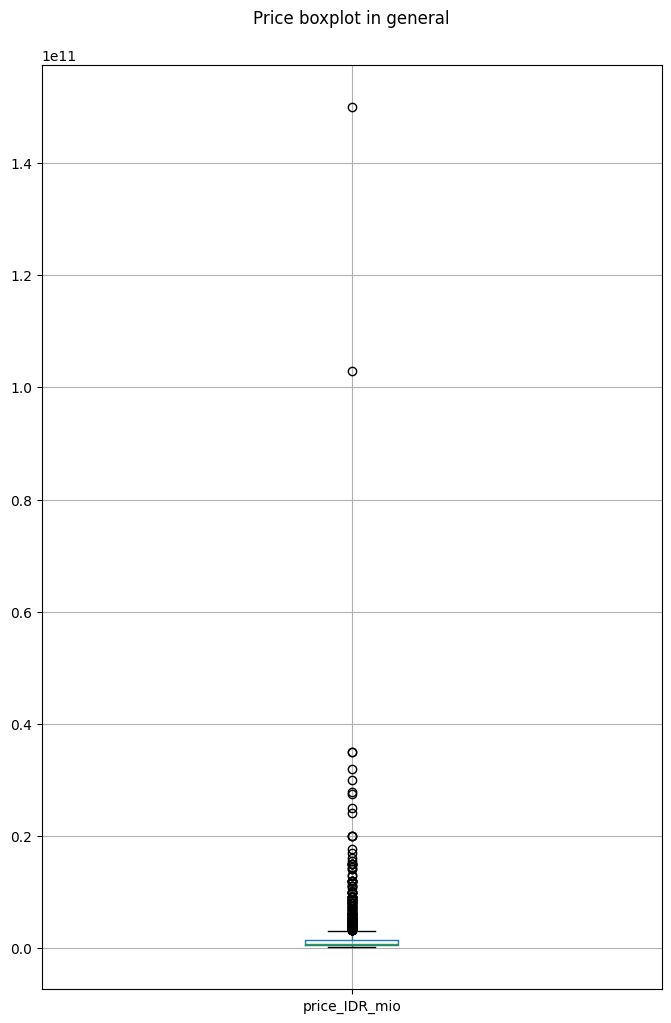

In [11]:
f, ax = plt.subplots(figsize=(8, 12))

df.boxplot(column='price_IDR_mio') # add boxplot to 1st subplot

plt.title("Price boxplot in general", pad=30)
plt.show()

some outliers detected

## Outliers detection

first we detect outliers using IQR method and then we split the dataframe based on the IQR

In [12]:
def outlier_check(data, extreme=False):
    dfa = data
    
    # calculate quartile 1
    Q1 = dfa.quantile(0.25)
    
    #calculate quartile 3
    Q3 = dfa.quantile(0.75)
    
    #calculate InterQuartile Range
    IQR = Q3 - Q1
    
    if extreme==True:
        #calculate Lower Bound with 3 factor
        LB = Q1 - (3*IQR)
        
        #calculate Lower Bound with 3 factor
        UB = Q3 + (3*IQR)
        
        if LB < 0:
            LB=  0
        
        print("Extreme Lower Bound (Lower Outer Fence) is:", LB)
        print("\n =========== \n")
        print("Extreme Upper Bound (Upper Outer Fence) is:", UB)
    else:
        #calculate Lower Bound with 1.5 factor
        LB = Q1 - (1.5*IQR)
        
        #calculate Upper Bound with 1.5 factor
        UB = Q3 + (1.5*IQR)
        
        if LB < 0:
            LB=  0
        
        print("Calculated Lower Bound (Lower Inner Fence) is:", LB)
        print("\n =========== \n")
        print("Upper Bound (Upper Inner Fence) is:", UB)
        
    return LB , UB

Lower / Upper Inner Fence

In [13]:
outlier_check(df["price_IDR_mio"])

Calculated Lower Bound (Lower Inner Fence) is: 0


Upper Bound (Upper Inner Fence) is: 3037500000.0


(0, 3037500000.0)

extreme outliers (Upper Outer Fence)

In [14]:
outlier_check(df["price_IDR_mio"], extreme=True)

Extreme Lower Bound (Lower Outer Fence) is: 0


Extreme Upper Bound (Upper Outer Fence) is: 4575000000.0


(0, 4575000000.0)

let's proceed to use Upper Inner Fence to filter out the outliers

In [15]:
df_outlier = df[df['price_IDR_mio'] > 3037500000]
df_outlier.head(3)

,title,desc,area,bedroom,bathroom,land_size,building_size,price_IDR_mio
7,Rumah klasik arsitektur jawa kuno Laweyan Solo,"Dijual rumah luas yang berlokasi di Sondakan Laweyan Surakarta.Rumah dengan bangunan klasik, atap joglo.Lokasi strategis tengah kota Solo.Spesifikasi :` Luas tanah 1400m2` Luas bangunan 1000m2` 14 Kamar tidur` 5 Kamar mandi` 2 dapur` Space parkir luas garasi bisa 5 mobil,` Lantai marmer serta atap joglo` Bagian belakang 2 lantai` Rooftop pondasi struktur kolam renang` Eks kolam renang uk 4x7 meter` Hadap selatan` Harga 14 milyarBerada dekat dengan kawasan kuliner serta dekat Kampung Batik Laweyan.Akses sangat mudah ke berbagai sarana umum :` 2 menit ke UNIBA` 3 menit ke Stasiun Purwosari` 5 menit ke RS Kasih Ibu` Minimarket, pasar tradisional, cafe serta hotel berbintang sangat mudah dijangkau.","Laweyan, Solo",11,5,1400,1000,14000000000
8,Rumah Mewah 2Lt Include Swimming Pool Area Strategis Tahap Finishing,"KODE : OFF Type : JUAL CEPAT Type : Rumah Mewah Finishing Dengan Kolam Renang Lokasi: Sumber Banjarsari Solo Spesifikasi: Luas Tanah : ± 300m² Luas Bangunan : ±308m² Lebar Depan : ± 18m Lantai: 1 Lantai Kamar tidur : 5+1 Kamar mandi : 4 Air : Sumur + Tandon Listrik : 3500 + 1300 Watt Kolam Renang : Panjang 10m Lebar 4m kedalaman 1,40 m Garasi : 2 Mobil Carport : 2 Mobil Sertifikat : SHM IMB : Ada Bangunan Tahun : 2024 Ruang lain2: Ruang Tamu, Ruang Keluarga , Dapur , Ruang Jemur , Garasi , Carpot , Teras , Halaman , Ruang Santai Hadap : Barat Akses jalan: Aspal Simpangan Mobil Keterangan Tambahan: Lokasi sangat strategis dan aman nyaman serta special edisi dengan bangunan istimewa satu lantai dengan kualitas spesifikasi terbaik sehingga cocok untuk hunian segala usia dan cocok juga untuk investasi Dekat dan mudah hanya : - 4 menit ke Stadion Manahan Solo - 5 menit ke Exit Tol Solo Klodran - 8 menit ke Terminal Tirtonadi Solo - 20 menit ke Bandara Adisumarmo Harga : 5,25 M Nego Langsu","Banjarsari, Solo",5,4,300,308,5250000000
33,"Dijual Rumah Nusukan, Banjarsari","Rumah Luas, bangunan Terawat, Siap Huni +5 Menit ke Luwes Nusukan Terminal +7 Menit ke Kampus UNISRI Luas Tanah 635m2 Hadap Utara 5 Kamar Tidur 5 Kamar Mandi Listrik 1300W Air PAM 2Garasi/Carport","Banjarsari, Solo",5,5,635,635,4500000000


which areas are included in the outlier dataframe

In [16]:
pd.DataFrame(df_outlier['area'].value_counts()).reset_index()

,area,count
0,"Banjarsari, Solo",41
1,"Laweyan, Solo",39
2,"Manahan, Solo",12
3,"Jajar, Solo",10
4,"Serengan, Solo",9
5,"Kerten, Solo",9
6,"Jebres, Solo",7
7,"Solo Baru, Solo",6
8,"Mangkubumen, Solo",6
9,"Sumber, Solo",5


In [17]:
df_outlier.describe()

,bedroom,bathroom,land_size,building_size,price_IDR_mio
count,179.000000,179.000000,179.000000,179.000000,1.790000e+02
mean,16.122905,4.424581,654.586592,640.106145,9.182709e+09
std,134.130812,2.875440,540.560962,2401.213430,1.413899e+10
min,1.000000,1.000000,128.000000,100.000000,3.150000e+09
25%,4.000000,3.000000,318.500000,300.000000,3.875000e+09
50%,5.000000,4.000000,450.000000,400.000000,5.500000e+09
75%,7.000000,5.000000,814.000000,561.500000,9.000000e+09
max,1800.000000,20.000000,3500.000000,32325.000000,1.500000e+11


### df_outlier insights

it is worth to investigate further the listing that has 1800 bedrooom or building size of 32,325 m2. But for now, let's just display it without cleaning the data

In [18]:
df_outlier[df_outlier['bedroom'] > 20]

,title,desc,area,bedroom,bathroom,land_size,building_size,price_IDR_mio
472,Rumah kost Murah Dekat Manahan,"Kode : GH ED 013468 Jual Cepat BU Rumah Kost Strategis Bonus Tempat Usaha. Lokasi : Sumber, Banjarsari, Solo. Spesifikasi: Luas Tanah : 219 m² Luas Bangunan : ± 550 m² Lebar Depan : 7 m (bentuk tanah letter L) Jumlah Lantai : 4 lantai Kamar tidur : 34 Kamar mandi : 14 (kmr mndi dlm) dan 6 (kmr mndi luar) Air : Sumur bor dan Tandon air Listrik : 11rb Watt dan 900 Watt Carport : 4 mobil dan 15 motor Garasi : - Sertifikat : SHM IMB : Ada PBB : Ada Bangunan Tahun : 2014, renov terakhir 2020. Ruang lain2: Ruang Tamu,Ruang Tempat usaha,Ruang cuci,Jemuran,dll. Hadap : Utara. Akses jalan: Aspal halus, simpangan mobil lancar. Furnish : Ac (utk sebagian kmr),springbed,lemari plastik. Keterangan Tambahan : ± 3 menit ke Graha Saba Buana. ± 4 menit ke Terminal Tirtonadi. ± 5 menit ke Stadion Manahan. ± 6 menit ke Pintu Tol Klodran. ± 8 menit Ke Solo Square dan Paragon Mall. Harga : 3,5 Milyar Nego Pemilik Langsung.","Banjarsari, Solo",34,20,219,550,3500000000
792,"Rumah dan gudang strategis, dekat terminal solo","Rumah dan gudang strategis, dekat terminal solo, jalan setiabudi, luas tanah 2285m2, lebar depan 45m, luas bangunan 1800m2, bangunan 2lantai, atas untuk rumah tinggal, bawah untuk usaha, dapat akses 3jalan, listrik 16000w, air pam, harga 30M nego","Gilingan, Solo",1800,1,2285,1800,30000000000


we can see that bedroom is the same as building_size, which is illogical. We cannot find the correct bedroom in the desc column.let's leave it as is for now.

In [19]:
df_outlier[df_outlier['building_size'] > 3500]

,title,desc,area,bedroom,bathroom,land_size,building_size,price_IDR_mio
557,Rumah Hook Bagus Tengah Kota Strategis Stadion Manahan,"Kode MA : TY NS 014008 Type list : JUAL CEPAT Type property : Rumah Hook Tengah Kota Lokasi : Manahan Banjarsari Surakarta Spesifikasi : Luas tanah : ± 275m² Luas Bangunan : ± 323,25m² Lebar depan : ± 21m Lantai : 3 Kamar tidur : 3 (lantai 2) Kamar mandi : 1 (lantai 1) & 3 (lantai 2) Kamar pembantu : 1 (lantai 3) Kamar studio/karaoke : 1 (lantai 2) Carport: 5 mobil Hadap : Timur dan Utara Air : Tanah Listrik : 4500wattt Tahun dibangun : 2006 Legalitas: SHM IMB : Ada PBB : Ada Ruang lain : Ruang Tamu, Ruang Keluarga, Ruang Makan,dan Dapur.Akses jalan : Simpangan Mobil Motor Keterangan tambahan : Akses Mudah dan dekat ke Fasilitas publik : + Dekat ke Stadion Manahan + Dekat Sekolah International + 5 Menit ke SMAN 4, SMKN 2, SMPN 1 + 8 Menit ke Solo Grand Mall, Solo Square Mall + 10 Menit ke Stasiun Purwosari + 20 menit ke Bandara Adi Sumarmo Boyolali Harga : 3,5M nego pemilik.","Manahan, Solo",3,4,275,32325,3500000000


we can see from filtered dataframe above, the correct building size is 323,25m2 not 32325 m2 (from the desc column), so we may fix this.

checking listing with price more than 50 Billion IDR. The reason is pure curiosity.

In [20]:
df_outlier[df_outlier['price_IDR_mio'] > 50000000000]

,title,desc,area,bedroom,bathroom,land_size,building_size,price_IDR_mio
176,BU DIJUAL RUMAH DIPINGGIR JLN PROTOKOL JLN BRIGJEN SLAMET RIYADI SOLO,"Rumah di pinggir jalan Protokol,Jln Brugjen Slamet Riyadi.Dekat semua fasum,sangat cocok utk bisnis.Showroom,Dealer,Hotel Bintang 5,Kantor,Bank dll Rumah menghadap ke Utara.Lebar depan 30m.Bebas hambatan.Sangat Startegis.Siap cari buyer langsng NVL.","Purwosari, Solo",4,3,2342,1500,150000000000
474,DIJUAL RUMAH KUNO MODEL BELANDA DI PINGGIR JALAN SLAMET RIYADI SOLO,Rumah Kuno antik di Tengah Kota Solo jln Raya.Luas : 2300m Lebar depan : 6m Legalitas : SHM Menghadap : Selatan Di cari buyer yg benar2 valid.,"Timuran, Solo",4,3,2300,1500,103000000000


based on the cell result above, the price above 50 Billion IDR is justified. no wrong input or wrong parsing.

[DIJUAL RUMAH KUNO MODEL BELANDA DI PINGGIR JALAN SLAMET RIYADI SOLO](https://www.lamudi.co.id/jual/jawa-tengah/surakarta-solo/dijual-rumah-kuno-model-belanda-di-pinggir-jalan-s-170304615967/)

[BU DIJUAL RUMAH DIPINGGIR JLN PROTOKOL JLN BRIGJEN SLAMET RIYADI SOLO](https://www.lamudi.co.id/jual/jawa-tengah/surakarta-solo/bu-dijual-rumah-dipinggir-jln-protokol-jln-brigjen-170830235316/)

## df_after_outlier

we use Upper Inner Fence as the upper threshold (1.5 IQR) to filter outliers

In [21]:
df_after_outlier = df[df['price_IDR_mio'] < 3037500000]
df_after_outlier.shape

(1308, 8)

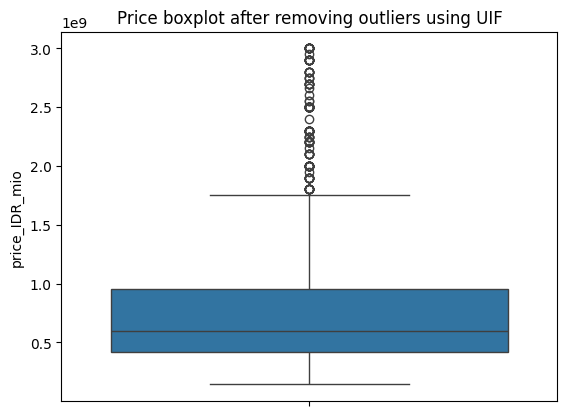

In [22]:
sns.boxplot(data=df_after_outlier['price_IDR_mio'])
plt.title("Price boxplot after removing outliers using UIF")
plt.show()

even after removing outliers using Upper Inner Fence, we still have some outliers in the new filtered dataframe, let's just leave it as it is for now

In [23]:
df_after_outlier.describe()

,bedroom,bathroom,land_size,building_size,price_IDR_mio
count,1308.000000,1308.000000,1308.000000,1308.000000,1.308000e+03
mean,3.055810,2.168960,105.682722,97.732416,8.494556e+08
std,1.935637,6.167991,63.791630,77.367516,6.572971e+08
min,1.000000,1.000000,8.000000,25.000000,1.434200e+08
25%,2.000000,1.000000,71.000000,45.000000,4.153750e+08
50%,3.000000,2.000000,78.000000,68.000000,6.000000e+08
75%,3.000000,2.000000,114.000000,110.000000,9.500000e+08
max,44.000000,211.000000,617.000000,550.000000,3.000000e+09


we have bathroom and bedroom issues. Is it possible to have 44 bedrooms or 211 bathrooms? We need to check it.

### bathroom issue

211 bathroom looks like a mistake, let's try to find out

In [24]:
df_after_outlier[df_after_outlier['bathroom'] == 211]

,title,desc,area,bedroom,bathroom,land_size,building_size,price_IDR_mio
393,Perumahan mewah di pondok solobaru Solobaru 2 lantai,Loaksi perumahan andalusia ±5 menit Dr Oen Solobaru Perumahan Muslim Solobaru Tentu menjadikan nilai lebih kedepannya .Clastur .2 Lantai .SHM Readi .Jalan Paving lebar Type rumah a.Type 110/72 b.Type 131/108 c.Bisa request type lainnya,"Pasar Kliwon, Solo",3,211,72,110,858000000


it is impossible to have 211 bathroom with these size of land and building, but the online webpage has 211 as bathroom size.

Check here : [Perumahan mewah di pondok solobaru Solobaru 2 lantai](https://www.lamudi.co.id/jual/jawa-tengah/surakarta-solo/perumahan-mewah-di-pondok-solobaru-solobaru-2-lant-170193659048/)

judging from the size of land and building, it should be 2, not 211. let's clean it.

In [25]:
df_after_outlier['bathroom'] = df_after_outlier['bathroom'].replace(211, 2)
df_after_outlier[df_after_outlier['bathroom'] == 211]

C:\Users\brian\AppData\Local\Temp\ipykernel_4136\3265665095.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_after_outlier['bathroom'] = df_after_outlier['bathroom'].replace(211, 2)


,title,desc,area,bedroom,bathroom,land_size,building_size,price_IDR_mio


In [26]:
df_after_outlier.describe()

,bedroom,bathroom,land_size,building_size,price_IDR_mio
count,1308.000000,1308.000000,1308.000000,1308.000000,1.308000e+03
mean,3.055810,2.009174,105.682722,97.732416,8.494556e+08
std,1.935637,2.156801,63.791630,77.367516,6.572971e+08
min,1.000000,1.000000,8.000000,25.000000,1.434200e+08
25%,2.000000,1.000000,71.000000,45.000000,4.153750e+08
50%,3.000000,2.000000,78.000000,68.000000,6.000000e+08
75%,3.000000,2.000000,114.000000,110.000000,9.500000e+08
max,44.000000,66.000000,617.000000,550.000000,3.000000e+09


kind of weird to have have 66 bathroom. let's investigate this using values_count in a dataframe, so we know the count of each bathroom

In [27]:
pd.DataFrame(df_after_outlier['bathroom'].value_counts()).reset_index().sort_values(by='bathroom')

,bathroom,count
1,1,498
0,2,577
2,3,128
3,4,66
4,5,17
6,6,5
12,7,1
7,8,4
5,9,7
8,10,2


only 1 count of listing with 66 bathroom, looks like typing or input error, let's display it below

In [28]:
df_after_outlier[df_after_outlier['bathroom'] == 66]

,title,desc,area,bedroom,bathroom,land_size,building_size,price_IDR_mio
313,Dijual perumahan premium 2 lantai ±5 menit Indogrosir palur karanganya,Yuk perbanyak sedekah di bulan suci ramadhan Banyak kegiatan ibadah hunia mewah 2 lantai .Cluster .Lokasi Nyaman .Jaln paving lebar Akses lokasi : ±78 meter Jl Raya Bekonang - Palur ±80 meter SMPN 2 Mojolaban ±100 meter Koramil Mojolaban ±100 meter Indomaret ±5 menit Indogrosir palur karanganyar ±7 menit Pasar Bekonang ±8 menit Wisata Taman Satwa Jurug ±10 menit Kampus UNS Surakarta,"Jebres, Solo",3,66,87,66,870000000


if we check the online page, the property, listed 66 bathroom, same value as the building_size. This must be a mistake from the advertiser. How can you fit 66 bathroom to a 66m2 land size? For the sake of analysis, we will assume the number of bathroom equal to the number of bedroom.

[Dijual perumahan premium 2 lantai ±5 menit Indogrosir palur karanganya](https://www.lamudi.co.id/jual/jawa-tengah/surakarta-solo/dijual-perumahan-premium-2-lantai-5-menit-indogros-169626624922/)

In [29]:
df_after_outlier['bathroom'] = df_after_outlier['bathroom'].replace(66, 3)
df_after_outlier[df_after_outlier['bathroom'] == 66]

C:\Users\brian\AppData\Local\Temp\ipykernel_4136\2952015847.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_after_outlier['bathroom'] = df_after_outlier['bathroom'].replace(66, 3)


,title,desc,area,bedroom,bathroom,land_size,building_size,price_IDR_mio


In [30]:
df_after_outlier.describe()

,bedroom,bathroom,land_size,building_size,price_IDR_mio
count,1308.000000,1308.000000,1308.000000,1308.000000,1.308000e+03
mean,3.055810,1.961009,105.682722,97.732416,8.494556e+08
std,1.935637,1.231756,63.791630,77.367516,6.572971e+08
min,1.000000,1.000000,8.000000,25.000000,1.434200e+08
25%,2.000000,1.000000,71.000000,45.000000,4.153750e+08
50%,3.000000,2.000000,78.000000,68.000000,6.000000e+08
75%,3.000000,2.000000,114.000000,110.000000,9.500000e+08
max,44.000000,13.000000,617.000000,550.000000,3.000000e+09


### bedroom issue

let's display the values_count first

In [31]:
df_after_outlier['bedroom'].value_counts().reset_index().sort_values(by='bedroom', ascending=False)

,bedroom,count
13,44,1
15,24,1
14,19,1
16,14,1
10,13,2
12,12,1
11,11,2
5,10,12
9,9,4
8,8,4


let's check listing with bedroom more than 10

In [32]:
df_after_outlier[df_after_outlier['bedroom'] > 10]

,title,desc,area,bedroom,bathroom,land_size,building_size,price_IDR_mio
123,RUMAH KOS STRATEGIS PURWOSARI SOLO,"Kode MA : ER/ 001785Type Listing: JualType Property : Rumah + KostLokasi: Sondakan Laweyan SoloSpesifikasi:Luas Tanah : 286m²Luas Bangunan : 400m²Lebar Depan : 10mRumah Induk (2lantai)Kamar tidur : 5Kamar mandi : 2Rumah kost (2lantai)Kamar tidur : 6Kamar Mandi : 2Air : PAMListrik : 2200 WattCarport : 2 MobilSertifikat : SHMIMB : tdk adaBangunan Tahun : 1993Ruang lain2: ruang tamu, ruang keluarga, dapurHadap : UtaraAkses jalan: 5 m Papasan mobilKeterangan Tambahan :- Nyaman dan Aman untuk Hunian atau untuk tempat investasi- Akses kemanapun dekat dan mudah- 3 menit ke jalan Slamet Riyadi- 3 menit ke Robinson purwosari- 5 menit ke stasiun PurwosariHarga : 2.9M TURUN HARGA 2.5M Nego Langsung Pemilik","Laweyan, Solo",11,4,286,400,2900000000
219,JUAL RUMAH KOST MAHASISWA 13 KAMAR BELAKANG KAMPUS UNS SURAKARTA SOLO,KAMU SEDANG CARI RUMAH KOST MAHASISWA 13 KAMAR KAMAR MANDI DALAM BELAKANG KAMPUS UNS SOLO SURAKARTA. Dekat Kampus UNS Solo. Lingkungan Mahasiswa. Dekat Kantor Shopee Solo. Dekat ke Mojosongo. Listrik Token Per Kamar. Lebar Depan 9 meter. Monggo Cek Lokasi,"Jebres, Solo",13,13,105,105,1500000000
277,Rumah Nyaman Tengahkota Dekat Hotel Aston Solo,"Kode : GH 013498 Jual Cepat (BU) Rumah Nyaman Tengahkota Dekat Hotel Aston. Lokasi : Sondakan, Laweyan, Surakarta. Spesifikasi : Luas Tanah : 310 m² Luas Bangunan : ± 390 m² Lebar Depan : 15 m Kamar Tidur : 12 Kamar Mandi : 5 Lantai : 1,5lt Status : SHM IMB : Ada Air : Sumur bor dan PAM Listrik : 2200 Watt + 900 Watt Garasi : - Carport : 2 Mobil + 5 Motor Bangunan Tahun : 1990, Renov 2020 Hadap : Utara Ruang Lain : Teras depan, Parkir, Ruang tamu, R keluarga, Dapur, R Cuci Jemur, dll. Akses Jalan : Aspal Simpangan Mobil Pelan. Lokasi berada ditengahkota yg strategis dipusat keramaian. Dekat dengan : Mini market,Mall,Kampus,Kuliner,Hotel,PerkantoranPertokoan. Cocok untuk : Kost,Hunian ataupun investasi. Keterangan Tambahan : ± 2 menit ke Kampus UNIBA. ± 4 menit ke Stasiun Purwosari,Rs Kasih Ibu. ± 7 menit ke Solo Square Mall dan Rs Panti Waluyo. ± 8 menit ke Stadion Manahan. Harga : 1,9 M Nego Pemilik Langsung.","Laweyan, Solo",12,5,310,390,1900000000
602,"Dijual Kost Sondakan, Laweyan",Luas Tanah 266m2 Hadap Timur+Barat 13 Kamar Tidur 12 Kamar Mandi 2 Lantai Dekat Pusat Keramaian SHM,"Laweyan, Solo",13,12,266,266,2660000000
923,RUMAH MEWAH BERLOKASI SETRATEGIS DEKAT SOLO BARU,"RUMAH MEWAH MODERN 2 LANTAI TYPE BESAR FITUR LENGKAP DIKAWASAN DEKAT PUSAT BISNIS SOLO BARU AKSES MUDAH LANGSUNG AKSES UTAMA BAKI - SOLO BARU Ingin memiliki rumah mewah dengan harga terjangkau di sekitar Kota Solo Baru? Kesempatan emas menanti Anda! Kami memiliki rumah impian yang terletak hanya beberapa menit dari pusat kota Solo Baru, menawarkan kenyamanan modern dengan akses mudah ke segala fasilitas. FASILITAS : Main Gate Mewah One Gate Sistem Post Security 24 Jam Jalan Lebar 8 meter Taman Bermain Putaran Mobil SHM Lokasi strategis dekat : RS dr. Oen Solo Baru RS Indriyati Solo Baru Pusat Bisnis Solo Baru Pakuwon Mall Solo Baru The Park Solo Baru Al Azhar Solo Baru 10 MENIT KE LUWES GENTAN 15 menit ke STASIUN PURWOSARI Fitur Utama: Desain Modern: Rumah ini didesain dengan gaya kontemporer yang elegan, menawarkan ruang terbuka yang luas dan tata letak yang cerdas untuk memaksimalkan kenyamanan Anda. - Lokasi Premium: Terletak strategis dekat dengan pusat kota Sol Baru, Anda akan menikmati kemudahan akses ke pusat perbelanjaan, restoran, sekolah, dan tempat hiburan. - Fasilitas Luar Biasa: Dengan berbagai fasilitas seperti taman indah, kolam renang, dan area rekreasi, Anda dan keluarga dapat menikmati gaya hidup yang aktif dan sehat. - Keamanan 24 Jam: Keamanan rumah Anda adalah prioritas kami. Dengan sistem keamanan 24 jam, Anda dapat memiliki kedamaian pikiran yang lengkap. - Harga Terjangkau: Kami percaya bahwa mewujudkan impian memiliki rumah mewah tidak harus merusak anggaran Anda. Dengan har

In [33]:
df_after_outlier[df_after_outlier['bedroom'] == 44]

,title,desc,area,bedroom,bathroom,land_size,building_size,price_IDR_mio
923,RUMAH MEWAH BERLOKASI SETRATEGIS DEKAT SOLO BARU,"RUMAH MEWAH MODERN 2 LANTAI TYPE BESAR FITUR LENGKAP DIKAWASAN DEKAT PUSAT BISNIS SOLO BARU AKSES MUDAH LANGSUNG AKSES UTAMA BAKI - SOLO BARU Ingin memiliki rumah mewah dengan harga terjangkau di sekitar Kota Solo Baru? Kesempatan emas menanti Anda! Kami memiliki rumah impian yang terletak hanya beberapa menit dari pusat kota Solo Baru, menawarkan kenyamanan modern dengan akses mudah ke segala fasilitas. FASILITAS : Main Gate Mewah One Gate Sistem Post Security 24 Jam Jalan Lebar 8 meter Taman Bermain Putaran Mobil SHM Lokasi strategis dekat : RS dr. Oen Solo Baru RS Indriyati Solo Baru Pusat Bisnis Solo Baru Pakuwon Mall Solo Baru The Park Solo Baru Al Azhar Solo Baru 10 MENIT KE LUWES GENTAN 15 menit ke STASIUN PURWOSARI Fitur Utama: Desain Modern: Rumah ini didesain dengan gaya kontemporer yang elegan, menawarkan ruang terbuka yang luas dan tata letak yang cerdas untuk memaksimalkan kenyamanan Anda. - Lokasi Premium: Terletak strategis dekat dengan pusat kota Sol Baru, Anda akan menikmati kemudahan akses ke pusat perbelanjaan, restoran, sekolah, dan tempat hiburan. - Fasilitas Luar Biasa: Dengan berbagai fasilitas seperti taman indah, kolam renang, dan area rekreasi, Anda dan keluarga dapat menikmati gaya hidup yang aktif dan sehat. - Keamanan 24 Jam: Keamanan rumah Anda adalah prioritas kami. Dengan sistem keamanan 24 jam, Anda dapat memiliki kedamaian pikiran yang lengkap. - Harga Terjangkau: Kami percaya bahwa mewujudkan impian memiliki rumah mewah tidak harus merusak anggaran Anda. Dengan harga yang sangat kompetitif, Rumah ini adalah investasi yang cerdas untuk masa depan Anda. Jangan lewatkan kesempatan ini untuk memiliki rumah impian Anda! Hubungi kami hari ini untuk informasi lebih lanjut dan jadwalkan tur melihat properti. Jadikan rumah ini tempat tinggal Anda dan mulailah menjalani gaya hidup yang Anda impikan! Informasi selengkapnya hubungi segera nomor kontak kami dansurvay lokasi hubungi kontak wa kami di profil","Solo Baru, Solo",44,3,76,92,825200000


#### bedroom issue insight

turns out, listing with more than 10 bedroom, mostly are boarding house. But the listing with 44 bedroom, is likely to be wrongly advertised. Judging from the size of land and building, it makes more sense to have 4 bedrooms instead of 44. Let's replace 44 with 4.

In [34]:
df_after_outlier['bedroom'] = df_after_outlier['bedroom'].replace(44, 4)
df_after_outlier[df_after_outlier['bedroom'] == 44]

C:\Users\brian\AppData\Local\Temp\ipykernel_4136\2909301579.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_after_outlier['bedroom'] = df_after_outlier['bedroom'].replace(44, 4)


,title,desc,area,bedroom,bathroom,land_size,building_size,price_IDR_mio


## Boxplot of Price Distribution each area

## using df

In [35]:
df['area']

0                                                                                                                          Solo Baru, Solo                                                                    
1                                                                                                                            Manahan, Solo                                                                    
2                                                                                                                          Mojosongo, Solo                                                                    
3                                                                                                                             Jebres, Solo                                                                    
4                                                                                                                         Banjarsari, Solo                                  

clean new lines "\n" using lstrip and rstrip method

In [36]:
df['area'] = df['area'].str.rstrip()
df['area'] = df['area'].str.lstrip()
df['area']

C:\Users\brian\AppData\Local\Temp\ipykernel_4136\3047061139.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['area'] = df['area'].str.rstrip()
C:\Users\brian\AppData\Local\Temp\ipykernel_4136\3047061139.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['area'] = df['area'].str.lstrip()


0          Solo Baru, Solo
1            Manahan, Solo
2          Mojosongo, Solo
3             Jebres, Solo
4         Banjarsari, Solo
               ...        
1495          Sumber, Solo
1496      Banjarsari, Solo
1497       Solo Baru, Solo
1498    Pasar Kliwon, Solo
1499      Banjarsari, Solo
Name: area, Length: 1487, dtype: object

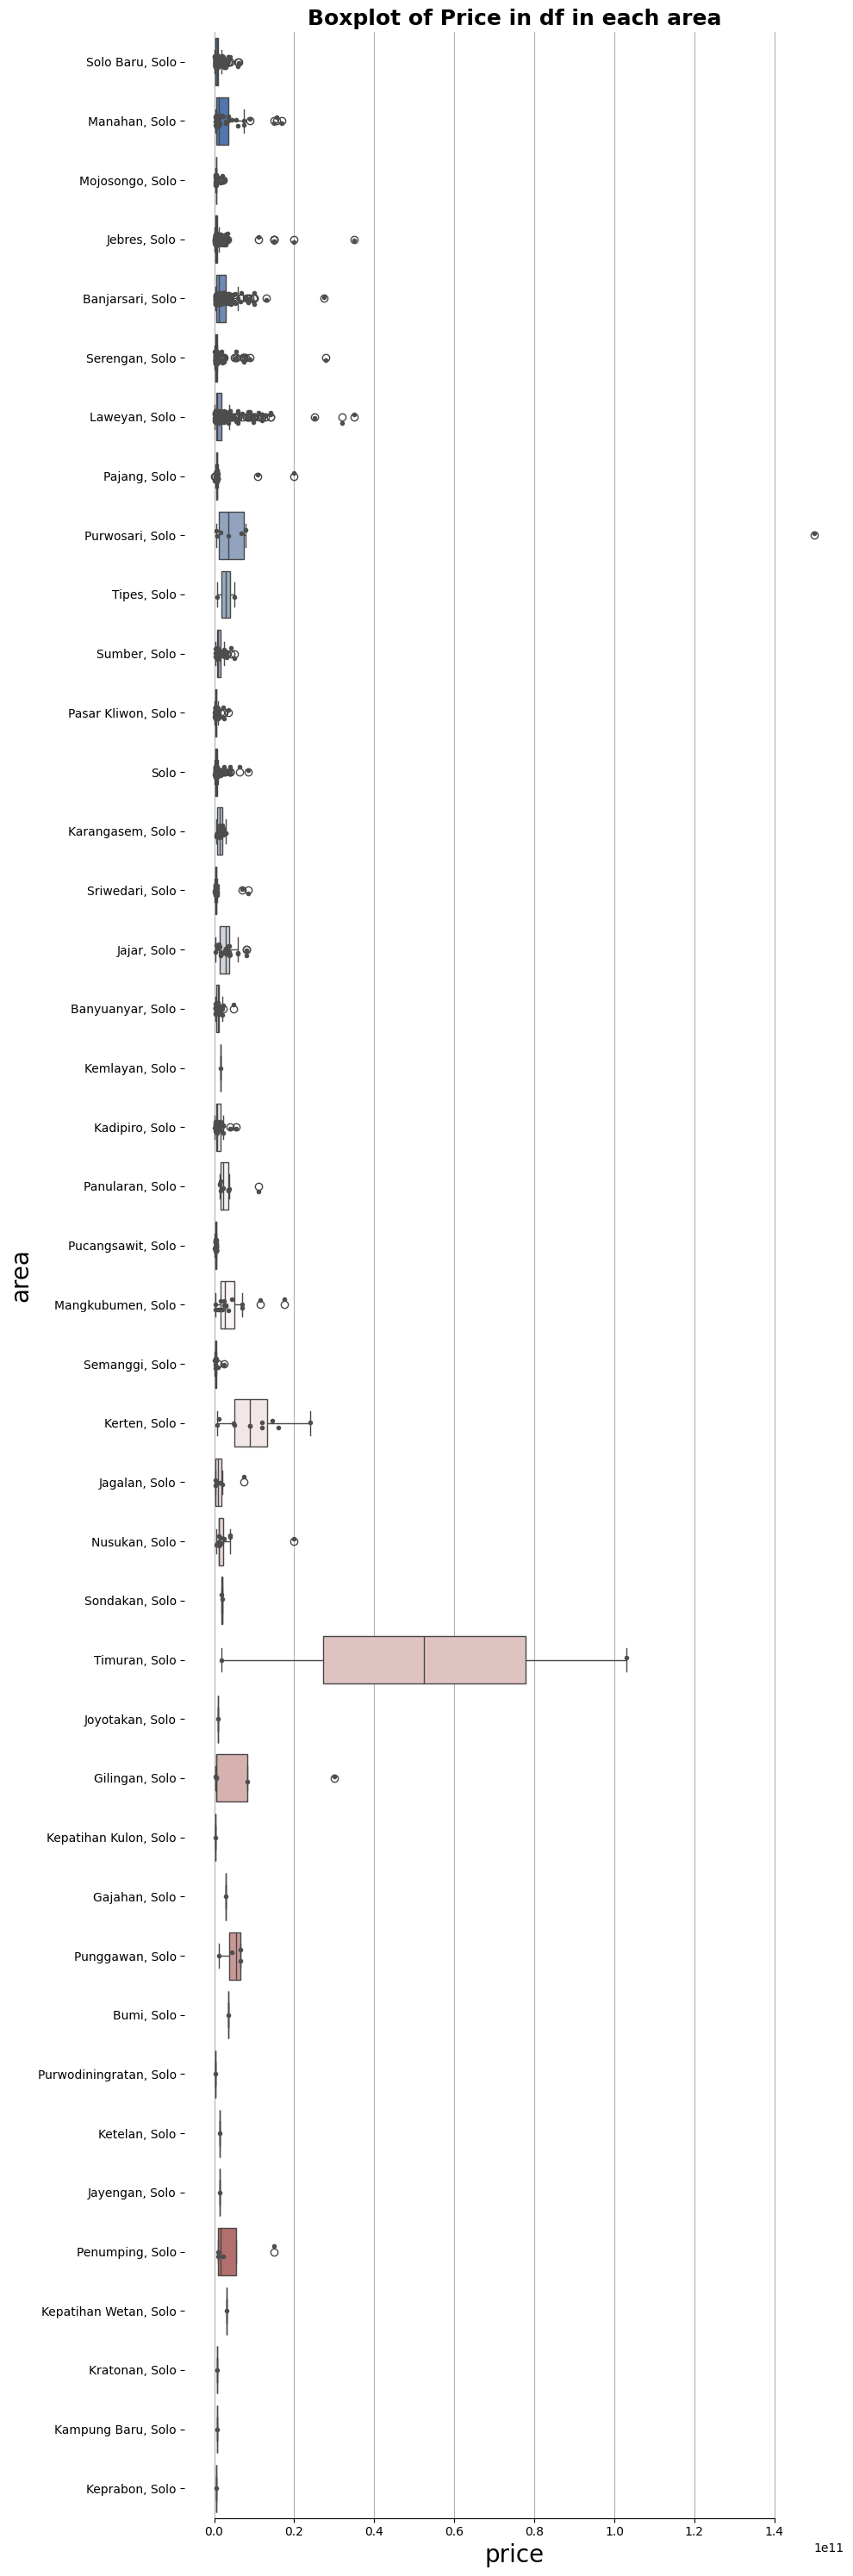

In [37]:
f, ax = plt.subplots(figsize=(10, 30))


sns.boxplot(x="price_IDR_mio", y="area", hue="area", width=0.8, palette="vlag", data=df)
sns.stripplot(df, x="price_IDR_mio", y="area", size=4, color=".3")

ax.xaxis.grid(True)
sns.despine(trim=True, left=True)

plt.xlabel("price", fontsize=20)
plt.ylabel("area", fontsize=20)
plt.title("Boxplot of Price in df in each area", fontsize = 18, weight="bold")
plt.tight_layout()
plt.show()

### insight

high variability of price in each area, area like Timuran, Solo depcited here has high range, but stripplot does not show many data points, further, when we look at the count listing, it only has 2 listing, see cell below. Therefore, we must take precaution when producing insights for example, mentioning its central tendency or building our machine learning model.

In [38]:
df_area[df_area['area'].str.contains('Timuran, Solo')]

,area,count,cumsum,cumperc
28,"Timuran, Solo",2,1473,99.058507


## using df_after_outlier

In [39]:
df_after_outlier['area']

0                                                                                                                          Solo Baru, Solo                                                                    
1                                                                                                                            Manahan, Solo                                                                    
2                                                                                                                          Mojosongo, Solo                                                                    
3                                                                                                                             Jebres, Solo                                                                    
4                                                                                                                         Banjarsari, Solo                                  

clean new lines "\n" using lstrip and rstrip methods

In [40]:
df_after_outlier['area']= df_after_outlier['area'].str.rstrip()
df_after_outlier['area']= df_after_outlier['area'].str.lstrip()
df_after_outlier['area']

C:\Users\brian\AppData\Local\Temp\ipykernel_4136\577788345.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_after_outlier['area']= df_after_outlier['area'].str.rstrip()
C:\Users\brian\AppData\Local\Temp\ipykernel_4136\577788345.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_after_outlier['area']= df_after_outlier['area'].str.lstrip()


0          Solo Baru, Solo
1            Manahan, Solo
2          Mojosongo, Solo
3             Jebres, Solo
4         Banjarsari, Solo
               ...        
1494        Serengan, Solo
1495          Sumber, Solo
1496      Banjarsari, Solo
1497       Solo Baru, Solo
1498    Pasar Kliwon, Solo
Name: area, Length: 1308, dtype: object

In [41]:
# set general parameter for color
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['axes.titlecolor'] = 'black'

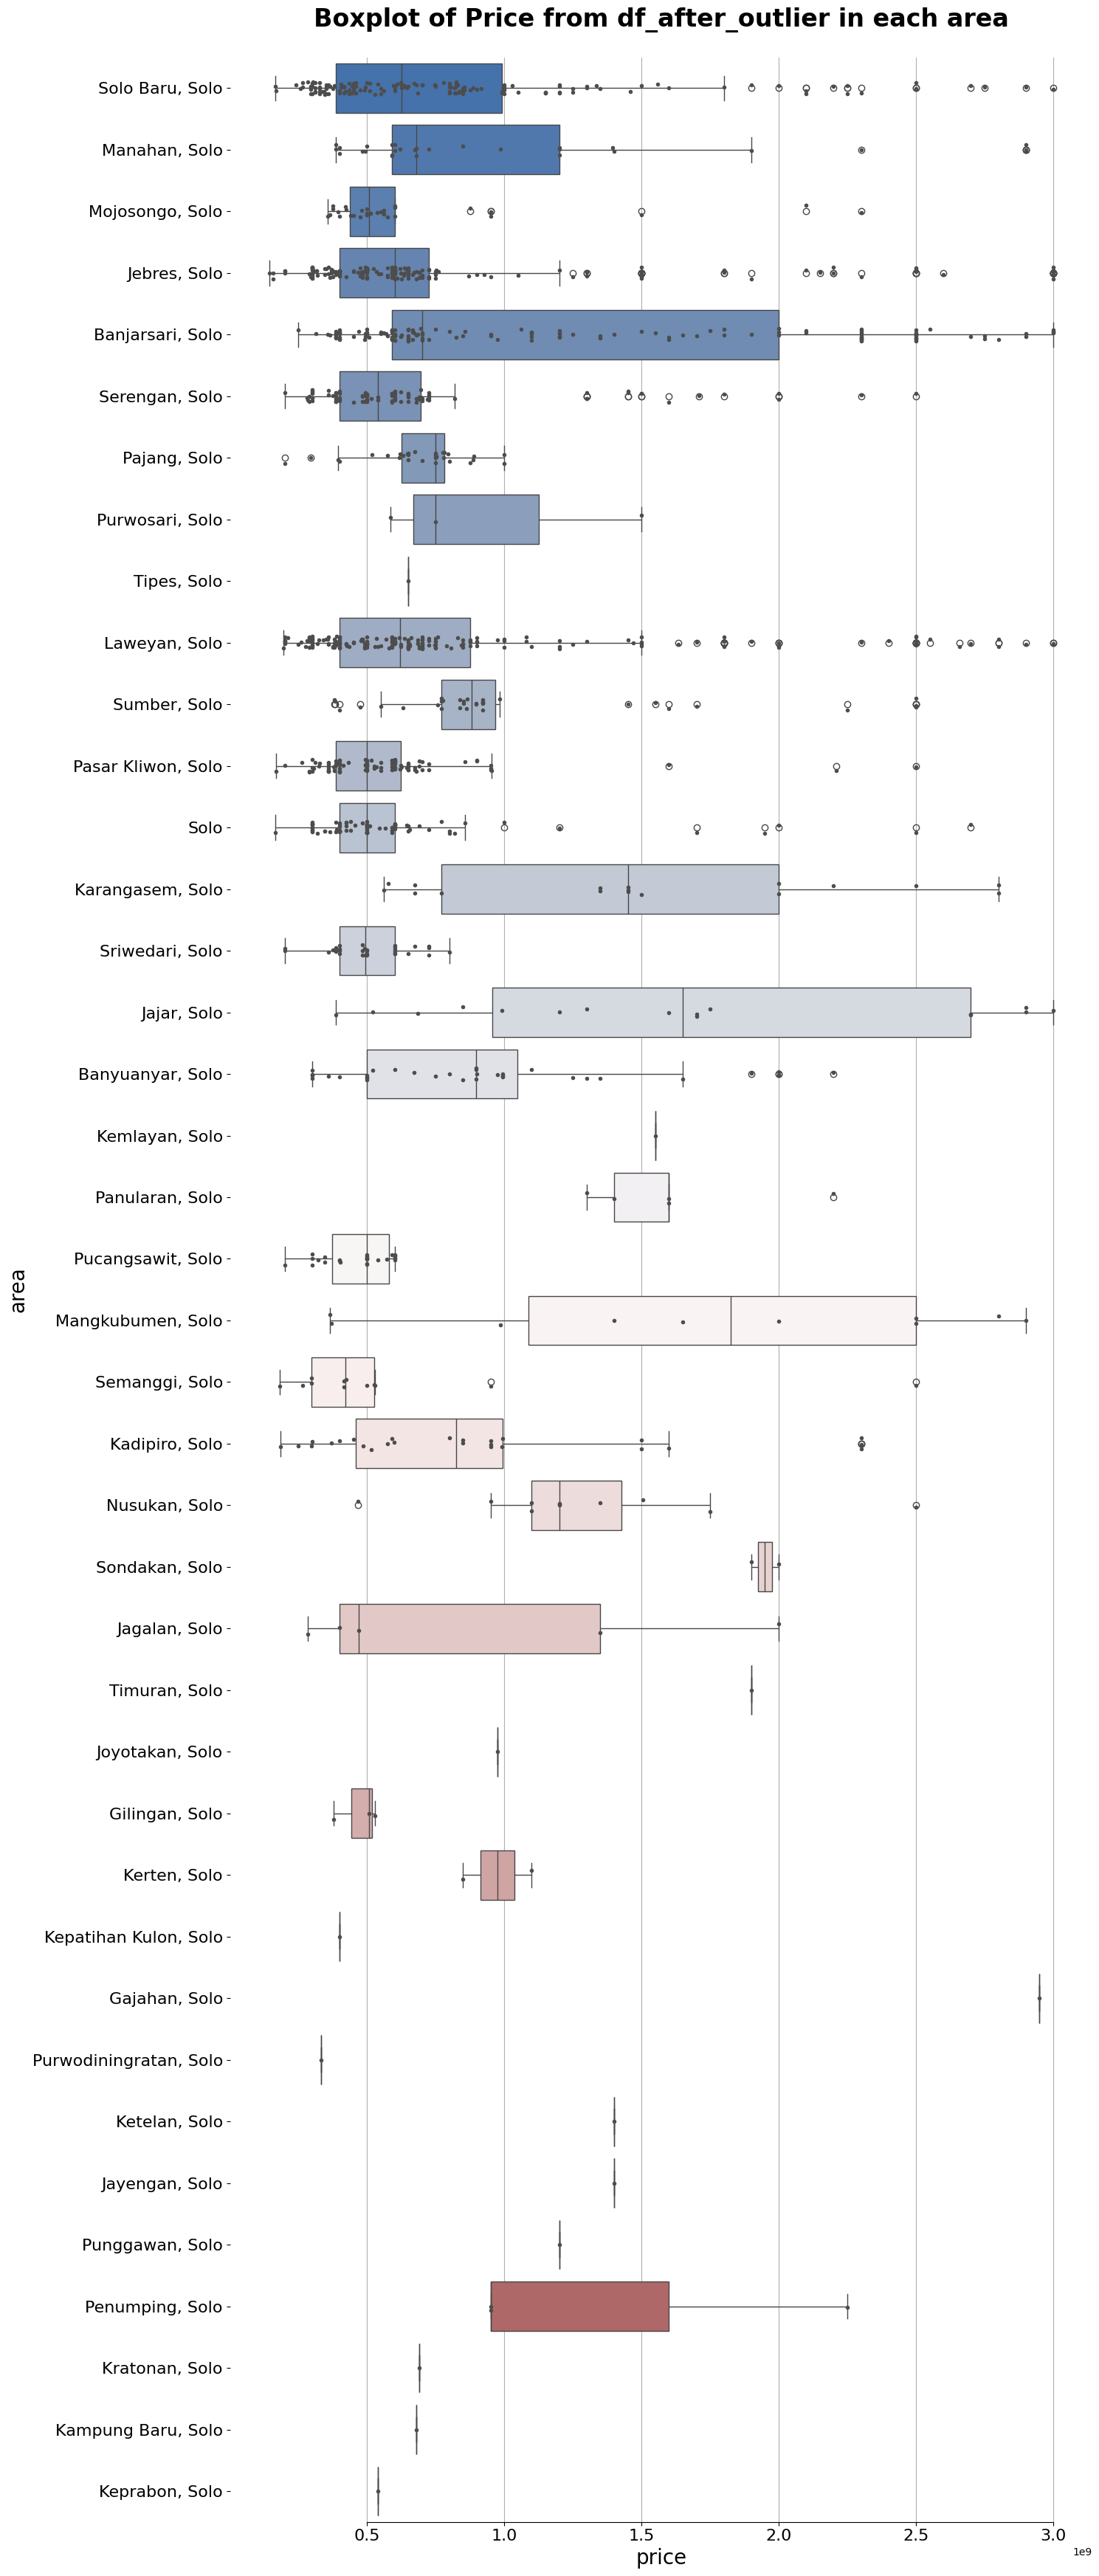

In [42]:
f, ax = plt.subplots(figsize=(15, 35))

# create the basis of boxplot
sns.boxplot(x="price_IDR_mio", y="area", hue="area", width=0.8, palette="vlag", data=df_after_outlier)

# layer it with stripplot to display the data points
sns.stripplot(df_after_outlier, x="price_IDR_mio", y="area", size=4, color=".3")

ax.xaxis.grid(True)
sns.despine(trim=True, left=True)

plt.title("Boxplot of Price from df_after_outlier in each area", fontsize = 24, weight="bold", pad= 30)
plt.xlabel("price", fontsize=20)
plt.xticks(fontsize=16)
plt.ylabel("area", fontsize=20)
plt.yticks(fontsize = 16)
plt.tight_layout()

plt.show()

### insights

data is clustered under 1 Billion IDR

## Descriptive Statistics

we format the float display overall so it does not display the result in scientific notation

In [43]:
pd.options.display.float_format = '{:.2f}'.format

### price

In [44]:
df_after_outlier['price_IDR_mio'].describe()

count         1308.00
mean     849455626.57
std      657297118.78
min      143420000.00
25%      415375000.00
50%      600000000.00
75%      950000000.00
max     3000000000.00
Name: price_IDR_mio, dtype: float64

### land_size

In [45]:
df_after_outlier['land_size'].describe()

count   1308.00
mean     105.68
std       63.79
min        8.00
25%       71.00
50%       78.00
75%      114.00
max      617.00
Name: land_size, dtype: float64

### building_size

In [46]:
df_after_outlier['building_size'].describe()

count   1308.00
mean      97.73
std       77.37
min       25.00
25%       45.00
50%       68.00
75%      110.00
max      550.00
Name: building_size, dtype: float64

## Scatter Plot

### visualize input features (bedroom, bathroom, land_size, building_size) vs price in scatter plot

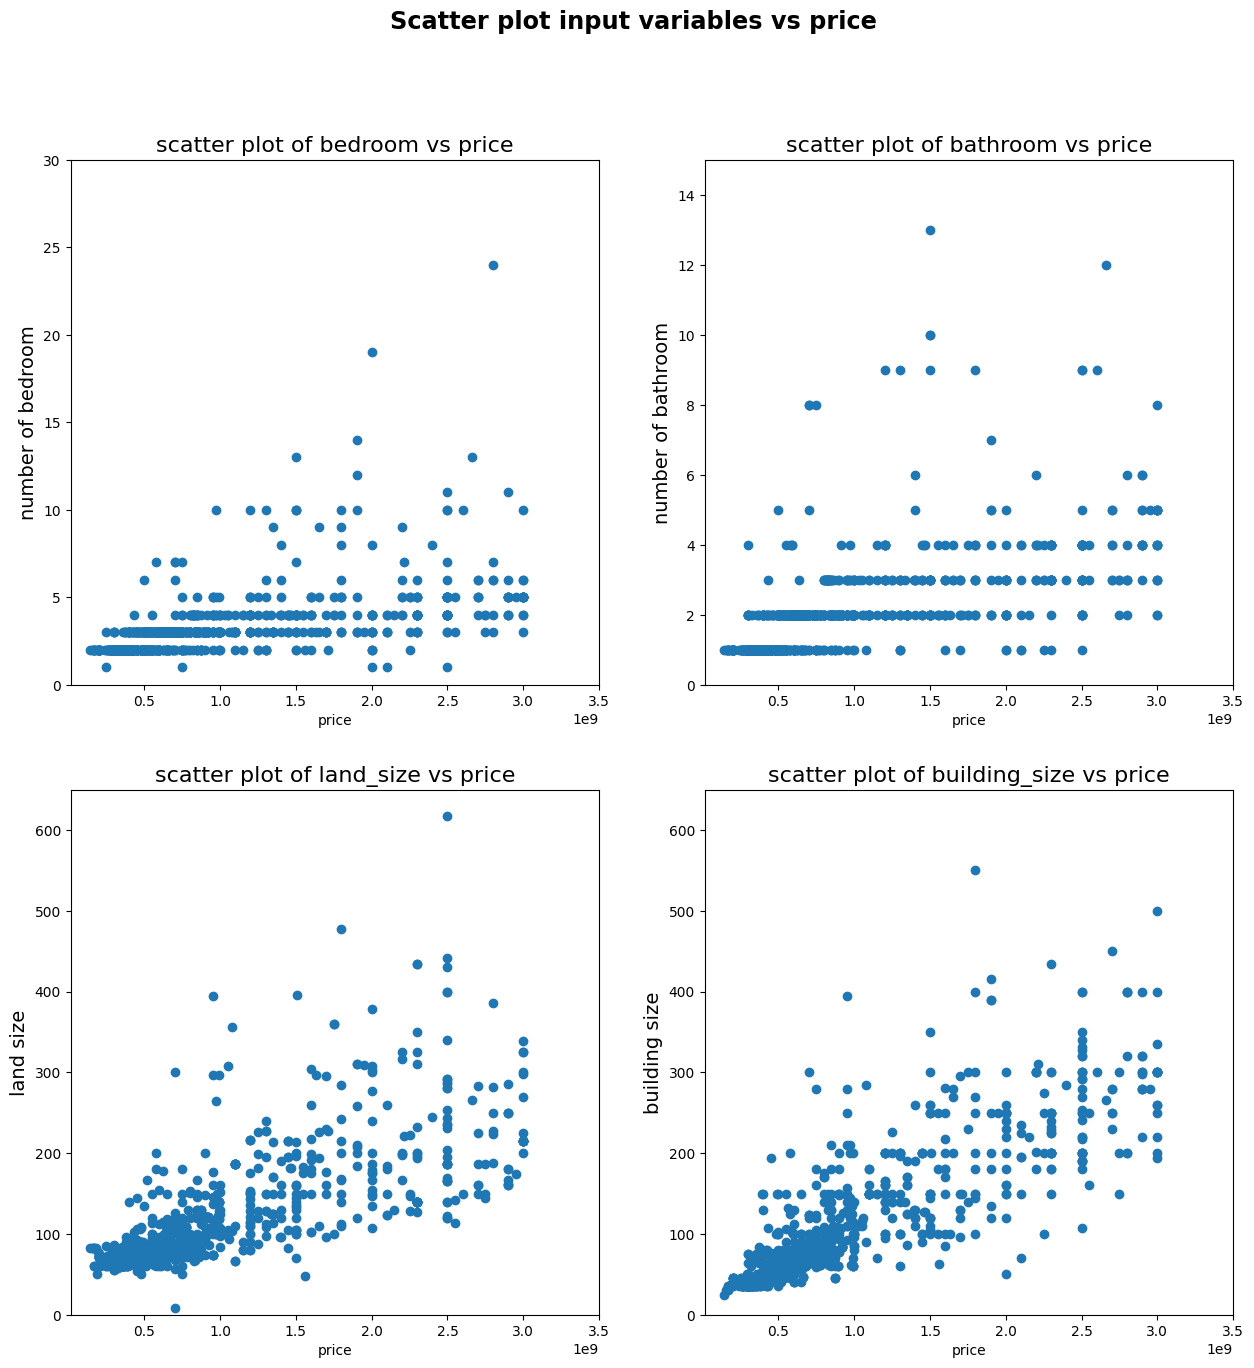

In [47]:
fig = plt.figure(figsize=(15,15))

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

# scatter plot axis 1 for bedrooom vs price, we set ylim bottom of 0 and top of 30 (because we know the max number of bedroom is 24)
ax1.scatter(x=df_after_outlier['price_IDR_mio'], y=df_after_outlier['bedroom'])
ax1.set_xlabel("price")
ax1.set_ylabel("number of bedroom", fontsize= 14)
ax1.set_ylim(bottom=0, top=30)
ax1.set_xlim(left= 14000000, right=3500000000)
ax1.set_title("scatter plot of bedroom vs price", fontsize = 16)

# scatter plot axis 2 for bathroom vs price, we set ylim top of 15 because we know the max number of bathroom is 15
ax2.scatter(x=df_after_outlier['price_IDR_mio'], y=df_after_outlier['bathroom'])
ax2.set_xlabel("price")
ax2.set_ylabel("number of bathroom", fontsize= 14)
ax2.set_ylim(bottom=0, top=15)
ax2.set_xlim(left= 14000000, right=3500000000)
ax2.set_title("scatter plot of bathroom vs price", fontsize = 16)

# scatter plot axis 3 for land_size vs price, we set ylim top of 650 because we know the max number of land_size is 600-ish
ax3.scatter(x=df_after_outlier['price_IDR_mio'], y=df_after_outlier['land_size'])
ax3.set_xlabel("price")
ax3.set_ylabel("land size", fontsize= 14)
ax3.set_ylim(bottom=0, top=650)
ax3.set_xlim(left= 14000000, right=3500000000)
ax3.set_title("scatter plot of land_size vs price", fontsize = 16)

# scatter plot of axis 4 foor building_size vs price, we set ylim tp of 650 , so that it is on the same scale as ax3 (land_size)
ax4.scatter(x=df_after_outlier['price_IDR_mio'], y=df_after_outlier['building_size'])
ax4.set_xlabel("price")
ax4.set_ylabel("building size", fontsize= 14)
ax4.set_ylim(bottom=0, top=650)
ax4.set_xlim(left= 14000000, right=3500000000)
ax4.set_title("scatter plot of building_size vs price", fontsize = 16)

# set title of the canvas
fig.suptitle(t="Scatter plot input variables vs price", size= "xx-large", weight="bold")

plt.show()

### insights scatter plots

is it possible to fit a linear line on these data points?

## Correlation Matrix

In [48]:
import numpy as np

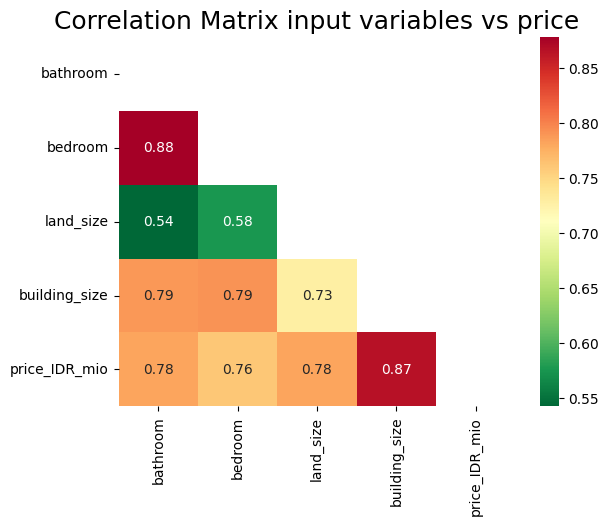

In [49]:
df_corr = df_after_outlier[['bathroom', 'bedroom', 'land_size', 'building_size', 'price_IDR_mio']]
corr = df_corr.corr(method='spearman')

# create mask to display only the bottom triangle
trimask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, cmap='RdYlGn_r', mask=trimask | (np.abs(corr) <= 0.4), annot=True)

plt.title("Correlation Matrix input variables vs price", fontsize = 18)
plt.show()

### insight corr

most features are highly correlated, this will become an issue when we build our regression model

# Regression Model Building

## preparation

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
df_after_outlier.columns

Index(['title', 'desc', 'area', 'bedroom', 'bathroom', 'land_size',
       'building_size', 'price_IDR_mio'],
      dtype='object')

In [52]:
inputvar = ["bedroom", "bathroom", "land_size", "building_size"]
target = ["price_IDR_mio"]
x = df_after_outlier[inputvar]
y = df_after_outlier[target]

In [53]:
x

,bedroom,bathroom,land_size,building_size
0,2,1,103,65
1,4,2,130,130
2,2,1,92,55
3,3,2,70,75
4,5,4,140,225
...,...,...,...,...
1494,3,2,79,64
1495,3,3,150,120
1496,3,2,81,64
1497,3,2,79,64


In [54]:
y

,price_IDR_mio
0,750000000
1,850000000
2,575000000
3,500000000
4,2300000000
...,...
1494,690000000
1495,1700000000
1496,600000000
1497,670000000


## data split

In [55]:
x_traina, x_testa, y_train, y_test = train_test_split(x,y, test_size=.2, random_state=33)

In [56]:
x_traina

,bedroom,bathroom,land_size,building_size
821,3,2,148,180
956,3,2,74,148
28,2,1,80,40
566,2,1,82,45
1074,2,1,80,40
...,...,...,...,...
1413,4,3,434,200
770,7,3,282,200
683,2,1,70,40
459,3,2,85,69


In [57]:
y_train

,price_IDR_mio
821,900000000
956,950315000
28,478000000
566,415232000
1074,400000000
...,...
1413,2300000000
770,2800000000
683,483000000
459,650000000


train dataset's index are matched

In [58]:
x_testa

,bedroom,bathroom,land_size,building_size
1420,3,2,85,69
101,3,2,75,64
214,2,1,70,40
1158,2,2,84,102
1392,2,1,72,40
...,...,...,...,...
358,2,1,62,45
334,3,2,84,70
1136,2,1,80,45
713,3,2,160,140


In [59]:
y_test

,price_IDR_mio
1420,842000000
101,725500000
214,400000000
1158,590000000
1392,382000000
...,...
358,345000000
334,631000000
1136,300000000
713,1000000000


test dataset index are matched.

## baseline model (Multiple Linear Regression)

### linear algebra (Ordinary Least Square)

calculate baseline prediction from mean of target and the baseline MSE from y_train, the baseline MSE then will be compared to the MSE of test or train after training the regression model

In [60]:
baseline_pred = np.mean(y_train)
print(baseline_pred)

852415959.4206501


In [61]:
base_pred = y_train.mean()
base_pred

price_IDR_mio   852415959.42
dtype: float64

In [62]:
from sklearn.metrics import mean_squared_error

baseline_mse = mean_squared_error(y_train, np.ones(len(y_train)) * baseline_pred)
print(baseline_mse)

4.3017990120157274e+17


### without standarization

using linear algebra (matrices multiplication) from scratch, we solve for beta

First, we add one more column in our x_train and x_test (the X matrix) with a value of 1, because of intercept (beta0) like so

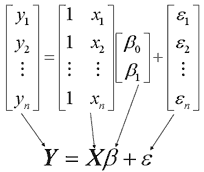

#### train_dataset

In [63]:
x_train = x_traina.copy()
x_train["intercept"] = 1
x_train = x_train[["intercept","bedroom", "bathroom", "land_size", "building_size"]]
x_train

,intercept,bedroom,bathroom,land_size,building_size
821,1,3,2,148,180
956,1,3,2,74,148
28,1,2,1,80,40
566,1,2,1,82,45
1074,1,2,1,80,40
...,...,...,...,...,...
1413,1,4,3,434,200
770,1,7,3,282,200
683,1,2,1,70,40
459,1,3,2,85,69


In [64]:
x_test = x_testa.copy()
x_test["intercept"] = 1
x_test = x_test[["intercept","bedroom","bathroom", "land_size", "building_size"]]
x_test

,intercept,bedroom,bathroom,land_size,building_size
1420,1,3,2,85,69
101,1,3,2,75,64
214,1,2,1,70,40
1158,1,2,2,84,102
1392,1,2,1,72,40
...,...,...,...,...,...
358,1,2,1,62,45
334,1,3,2,84,70
1136,1,2,1,80,45
713,1,3,2,160,140


In [65]:
X_T = x_train.T
X_T

,821,956,28,566,1074,594,507,1197,1164,1389,...,949,69,115,230,65,1413,770,683,459,1208
intercept,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
bedroom,3,3,2,2,2,2,3,3,3,3,...,4,3,2,2,2,4,7,2,3,2
bathroom,2,2,1,1,1,1,2,2,2,2,...,4,2,1,1,1,3,3,1,2,1
land_size,148,74,80,82,80,60,258,85,85,70,...,100,75,76,77,77,434,282,70,85,70
building_size,180,148,40,45,40,50,120,75,75,70,...,160,64,40,77,42,200,200,40,69,40


##### solve for betas with minimum MSE

$$
\begin{align*}
\text{MSE} &= \cfrac{1}{n} \sum_{i=1}^{n} e_{i}^2\\
\text{MSE} &= \cfrac{1}{n} (y-X\cdot\theta)^{2}
\end{align*}
$$

$$
\begin{align*}
\cfrac{\partial \text{MSE}}{\partial \theta} &= 0 \\
0 &= \cfrac{\partial}{\partial \theta} \cfrac{1}{n} (y-X\cdot\theta)^{2} \\
&= \cfrac{2}{n} (-X^{T}) (y - X \cdot \theta) \\
&= X^{T}y - (X^{T}X)\theta \\
\theta_{\text{optimum}} &= (X^{T}X)^{-1} X^{T} y
\end{align*}
$$

In [66]:
B_no_standard = np.linalg.inv(X_T @ x_train) @ X_T @ y_train #theta or beta optimum
B_no_standard.index =x_train.columns
B_no_standard

,price_IDR_mio
intercept,-23175148.82
bedroom,-47680108.26
bathroom,121489728.88
land_size,2998275.85
building_size,4698740.51


In [67]:
y_prediction_train_wo_standardization = x_train @ B_no_standard
y_prediction_train_wo_standardization

,price_IDR_mio
821,1366282101.57
956,994049992.28
28,430766052.00
566,460256306.24
1074,430766052.00
...,...
1413,2391573426.03
770,1792795171.73
683,400783293.47
459,655830526.59


In [68]:
y_train1 = y_train.rename(columns={'price_IDR_mio':'actual'})
y_pred_train = y_prediction_train_wo_standardization.rename(columns={'price_IDR_mio':'prediction'})
summary_train_pred = y_train1.join(y_pred_train)

summary_train_pred.head()

,actual,prediction
821,900000000,1366282101.57
956,950315000,994049992.28
28,478000000,430766052.00
566,415232000,460256306.24
1074,400000000,430766052.00


##### model eval from sklearn

In [69]:
from sklearn.metrics import r2_score, mean_absolute_error

In [70]:
r2b = r2_score(y_prediction_train_wo_standardization, y_train)
MAEb = mean_absolute_error(y_prediction_train_wo_standardization, y_train)
MSEb = mean_squared_error(y_prediction_train_wo_standardization, y_train)
comparison_mse_train = 100*(baseline_mse - MSEb) / baseline_mse


print(f"r2 score wo standardization is : {r2b}")
print(f"Mean Absolute Error wo standardization is : {MAEb}")
print(f"Mean Squared Error wo standardization is : {MSEb}")
print(f"Baseline MSE : {baseline_mse}")
print("Calculate comparison MSE = 100*(baseline_mse - MSEb)/ baseline_mse" )
print(f"MSE decrease {comparison_mse_train:.2f} %")

r2 score wo standardization is : 0.7269737912744552
Mean Absolute Error wo standardization is : 179990217.779719
Mean Squared Error wo standardization is : 9.226077726441854e+16
Baseline MSE : 4.3017990120157274e+17
Calculate comparison MSE = 100*(baseline_mse - MSEb)/ baseline_mse
MSE decrease 78.55 %


##### sklearn LinearRegression

In [71]:
from sklearn.linear_model import LinearRegression

In [72]:
lr = LinearRegression()

In [73]:
lr.fit(x_traina, y_train)

LinearRegression()

In [74]:
lr.intercept_ , lr.coef_

(array([-23175148.82081926]),
 array([[-4.76801083e+07,  1.21489729e+08,  2.99827585e+06,
          4.69874051e+06]]))

In [75]:
B_no_standard

,price_IDR_mio
intercept,-23175148.82
bedroom,-47680108.26
bathroom,121489728.88
land_size,2998275.85
building_size,4698740.51


we can see that the beta from our manual calculcation and using sklearn are the same.

##### plot actual vs prediction in train

In [76]:
# set general parameter for color
plt.rcParams['axes.facecolor'] = 'black'
plt.rcParams['figure.facecolor'] = 'black'
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['axes.titlecolor'] = 'white'

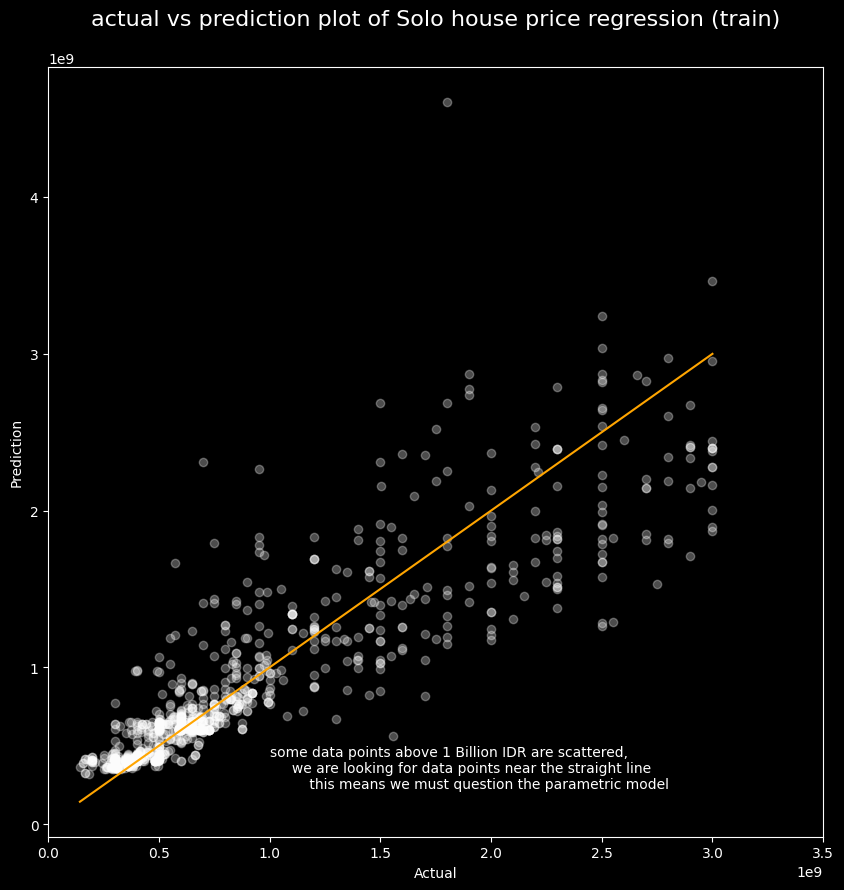

In [77]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()

ax.scatter(y_train,y_prediction_train_wo_standardization, c='white', alpha=0.3)
ax.plot([y.min(), y.max()],[y.min(), y.max()], color='orange')
ax.set_xlabel('Actual')
ax.set_ylabel('Prediction')
ax.set_xlim(0, 3500000000)

ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

ax.text(1000000000, 230000000, "some data points above 1 Billion IDR are scattered,\n \
    we are looking for data points near the straight line\n \
        this means we must question the parametric model", color='white')

ax.set_title("actual vs prediction plot of Solo house price regression (train)", fontsize= 16, color='white', pad=30)
plt.show()

##### residual plot (train)

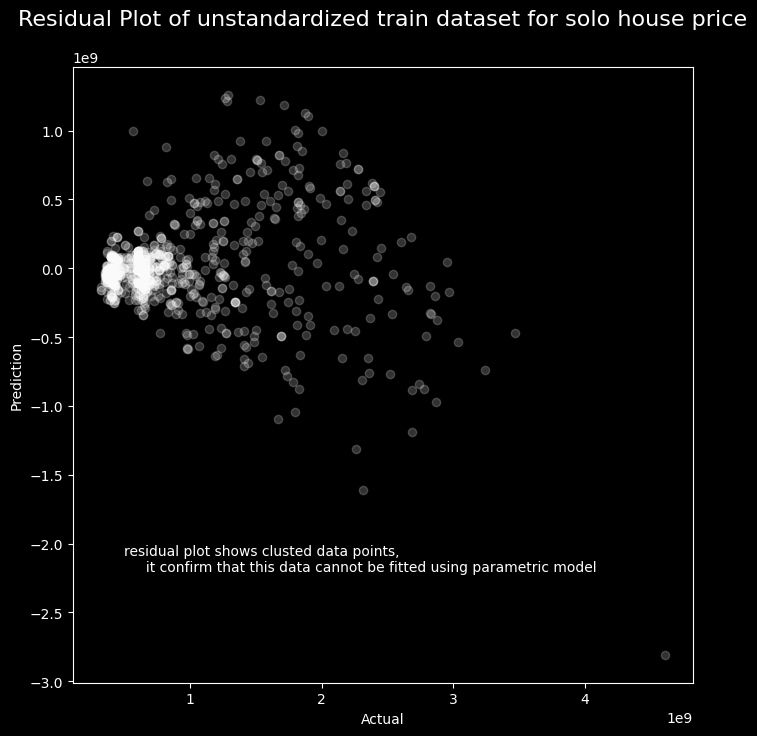

In [78]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()

ax.scatter(y_prediction_train_wo_standardization, y_train -y_prediction_train_wo_standardization, c='white', alpha=0.2)

ax.set_xlabel('Actual')
ax.set_ylabel('Prediction')

ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

ax.text(500000000, -2200000000, "residual plot shows clusted data points,\n \
    it confirm that this data cannot be fitted using parametric model", color='white')

ax.set_title("Residual Plot of unstandardized train dataset for solo house price", fontsize= 16, color='white', pad=30)
plt.show()

#### test_dataset

In [79]:
y_prediction_test_wo_standardization = x_test @ B_no_standard
y_prediction_test_wo_standardization

,price_IDR_mio
1420,655830526.59
101,602354065.53
214,400783293.47
1158,855570795.73
1392,406779845.18
...,...
358,400290789.19
334,657530991.24
1136,454259754.53
713,1214311791.50


In [80]:
lr.predict(x_testa)

array([[6.55830527e+08],
       [6.02354066e+08],
       [4.00783293e+08],
       [8.55570796e+08],
       [4.06779845e+08],
       [3.94294237e+08],
       [1.25859323e+09],
       [6.66550827e+08],
       [1.44797150e+09],
       [7.69495456e+08],
       [1.86626895e+09],
       [2.47754915e+09],
       [6.45537888e+08],
       [2.03991989e+09],
       [7.50520793e+08],
       [4.00783293e+08],
       [1.96359918e+09],
       [6.63035039e+08],
       [6.05352341e+08],
       [6.10051082e+08],
       [6.15555129e+08],
       [6.02354066e+08],
       [4.42759155e+08],
       [2.29900568e+09],
       [6.05352341e+08],
       [5.77562552e+08],
       [3.50305108e+08],
       [1.67207372e+09],
       [9.86892081e+08],
       [6.14347169e+08],
       [6.32336824e+08],
       [1.06373781e+09],
       [6.55830527e+08],
       [1.30157991e+09],
       [4.15774673e+08],
       [4.00783293e+08],
       [2.29940608e+09],
       [3.52005573e+08],
       [4.48263203e+08],
       [6.05352341e+08],


In [81]:
y_test

,price_IDR_mio
1420,842000000
101,725500000
214,400000000
1158,590000000
1392,382000000
...,...
358,345000000
334,631000000
1136,300000000
713,1000000000


In [82]:
y_test1 = y_test.rename(columns={'price_IDR_mio':'actual'})
y_pred1 = y_prediction_test_wo_standardization.rename(columns={'price_IDR_mio':'prediction'})
summary_test_pred = y_test1.join(y_pred1)

summary_test_pred.head()

,actual,prediction
1420,842000000,655830526.59
101,725500000,602354065.53
214,400000000,400783293.47
1158,590000000,855570795.73
1392,382000000,406779845.18


##### model evaluation (test)

In [83]:
r2_test_wo_std = r2_score(y_prediction_test_wo_standardization, y_test)
MAE_test_wo_std = mean_absolute_error(y_prediction_test_wo_standardization, y_test)
MSE_test_wo_std = mean_squared_error(y_prediction_test_wo_standardization, y_test)

print(f"r2 score test dataset wo standardization is : {r2_test_wo_std}")
print(f"Mean Absolute Error test dataset wo standardization is : {MAE_test_wo_std}")
print(f"Mean Squared Error test dataset wo standardization is : {MSE_test_wo_std}")

r2 score test dataset wo standardization is : 0.7069608219151053
Mean Absolute Error test dataset wo standardization is : 173665227.45054352
Mean Squared Error test dataset wo standardization is : 8.749123554734578e+16


##### plot actual v pred

C:\Users\brian\AppData\Local\Temp\ipykernel_4136\2330752799.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--k" (-> color='k'). The keyword argument will take precedence.
  ax.plot([y.min(), y.max()],[y.min(), y.max()], '--k', color='orange')


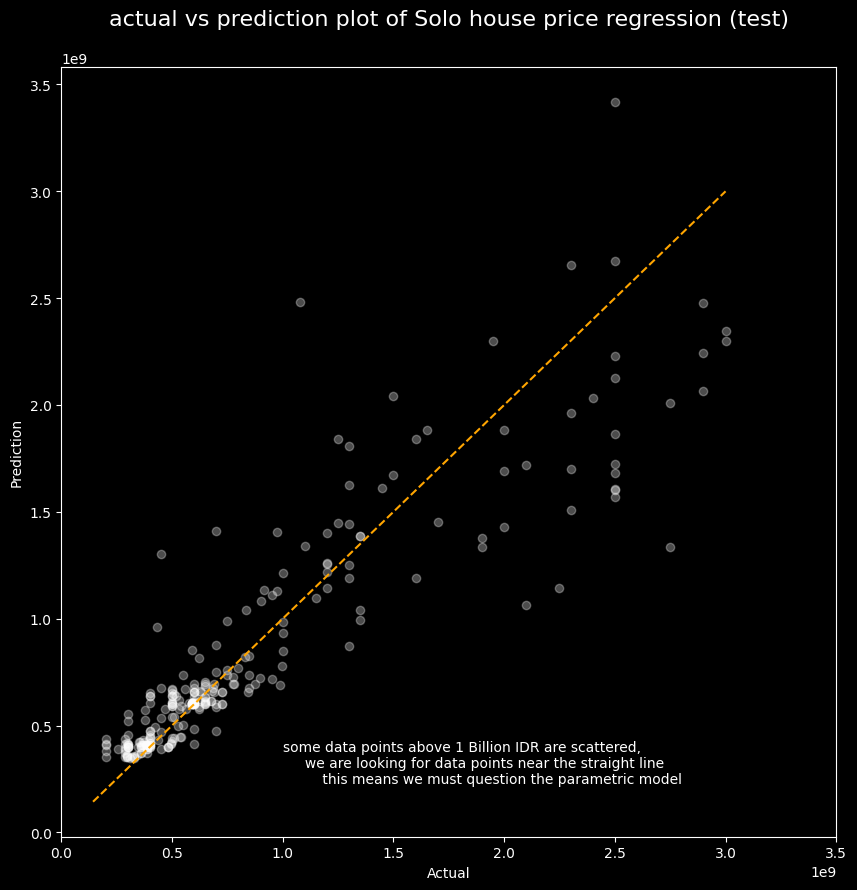

In [84]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()

ax.scatter(y_test,y_prediction_test_wo_standardization, c='white', alpha=0.3)
ax.plot([y.min(), y.max()],[y.min(), y.max()], '--k', color='orange')
ax.set_xlabel('Actual')
ax.set_ylabel('Prediction')
# ax.set_ylim(0,3)
ax.set_xlim(0, 3500000000)

ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

ax.text(1000000000, 230000000, "some data points above 1 Billion IDR are scattered,\n \
    we are looking for data points near the straight line\n \
        this means we must question the parametric model", color='white')

ax.set_title("actual vs prediction plot of Solo house price regression (test)", fontsize= 16, color='white', pad=30)
plt.show()

residual (test)

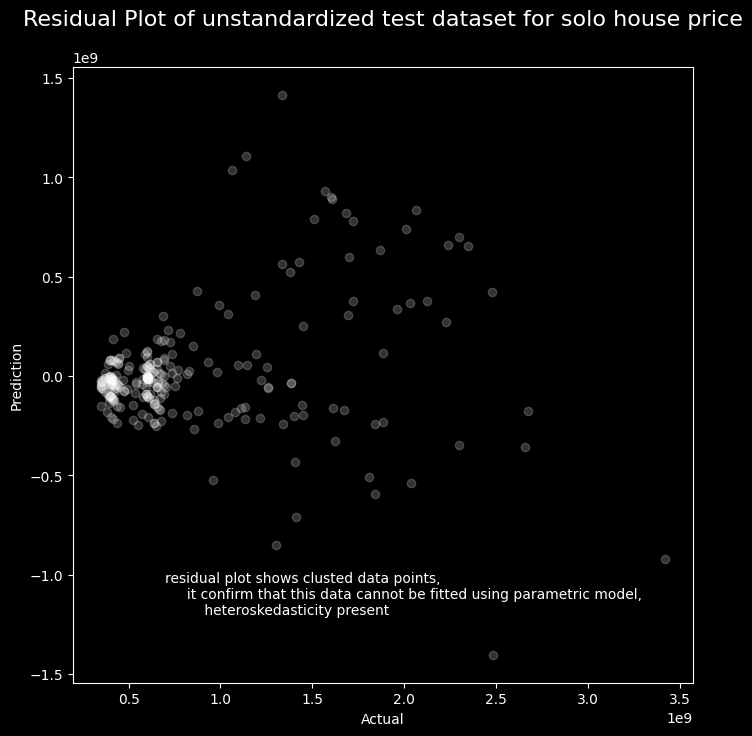

In [85]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()

ax.scatter(y_prediction_test_wo_standardization, y_test -y_prediction_test_wo_standardization, c='white', alpha=0.2)

ax.set_xlabel('Actual')
ax.set_ylabel('Prediction')

ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

ax.text(700000000, -1200000000, "residual plot shows clusted data points,\n \
    it confirm that this data cannot be fitted using parametric model, \n \
        heteroskedasticity present", color='white')

ax.set_title("Residual Plot of unstandardized test dataset for solo house price", fontsize= 16, color='white', pad=30)
plt.show()

### standardization


In [86]:
from sklearn.preprocessing import StandardScaler

#### fit and transform x_train and x_test

In [87]:
scaler = StandardScaler()
scaler.fit(x_traina)
x_train_scaled = scaler.transform(x_traina)
x_train_scaled = pd.DataFrame(x_train_scaled, columns= x_traina.columns, index=x_traina.index)


In [88]:
x_train_scaled

,bedroom,bathroom,land_size,building_size
821,-0.02,0.02,0.65,1.05
956,-0.02,0.02,-0.50,0.64
28,-0.64,-0.77,-0.40,-0.75
566,-0.64,-0.77,-0.37,-0.68
1074,-0.64,-0.77,-0.40,-0.75
...,...,...,...,...
1413,0.59,0.80,5.07,1.30
770,2.43,0.80,2.72,1.30
683,-0.64,-0.77,-0.56,-0.75
459,-0.02,0.02,-0.33,-0.38


In [89]:
x_train_scaled.describe()

,bedroom,bathroom,land_size,building_size
count,1046.00,1046.00,1046.00,1046.00
mean,-0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00
min,-1.25,-0.77,-0.90,-0.94
25%,-0.64,-0.77,-0.53,-0.68
50%,-0.02,0.02,-0.43,-0.38
75%,-0.02,0.02,0.11,0.20
max,12.84,8.61,7.90,5.79


fit first then transform for the sake of process clarity

In [90]:
# transform x_test using mean and stdev from train dataset
x_test_scaled = scaler.transform(x_testa)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_testa.columns, index=x_testa.index)
x_test_scaled

,bedroom,bathroom,land_size,building_size
1420,-0.02,0.02,-0.33,-0.38
101,-0.02,0.02,-0.48,-0.44
214,-0.64,-0.77,-0.56,-0.75
1158,-0.64,0.02,-0.34,0.05
1392,-0.64,-0.77,-0.53,-0.75
...,...,...,...,...
358,-0.64,-0.77,-0.68,-0.68
334,-0.02,0.02,-0.34,-0.36
1136,-0.64,-0.77,-0.40,-0.68
713,-0.02,0.02,0.83,0.53


In [91]:
x_test.describe()

,intercept,bedroom,bathroom,land_size,building_size
count,262.00,262.00,262.00,262.00,262.00
mean,1.00,2.97,1.89,104.29,95.29
std,0.00,1.28,1.01,60.16,74.44
min,1.00,2.00,1.00,8.00,35.00
25%,1.00,2.00,1.00,71.00,45.00
50%,1.00,3.00,2.00,77.00,64.00
75%,1.00,3.00,2.00,119.00,102.75
max,1.00,11.00,9.00,430.00,400.00


scaled transformation on train and test dataset completed. we can see from the result of describe() from x_test dataframe mean and stdev is not equal to 0 and 1 respectively (because we use mean and stdev of x_train to transform x_test).

#### train_dataset

##### scatter plot

In [92]:
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['axes.titlecolor'] = 'black'

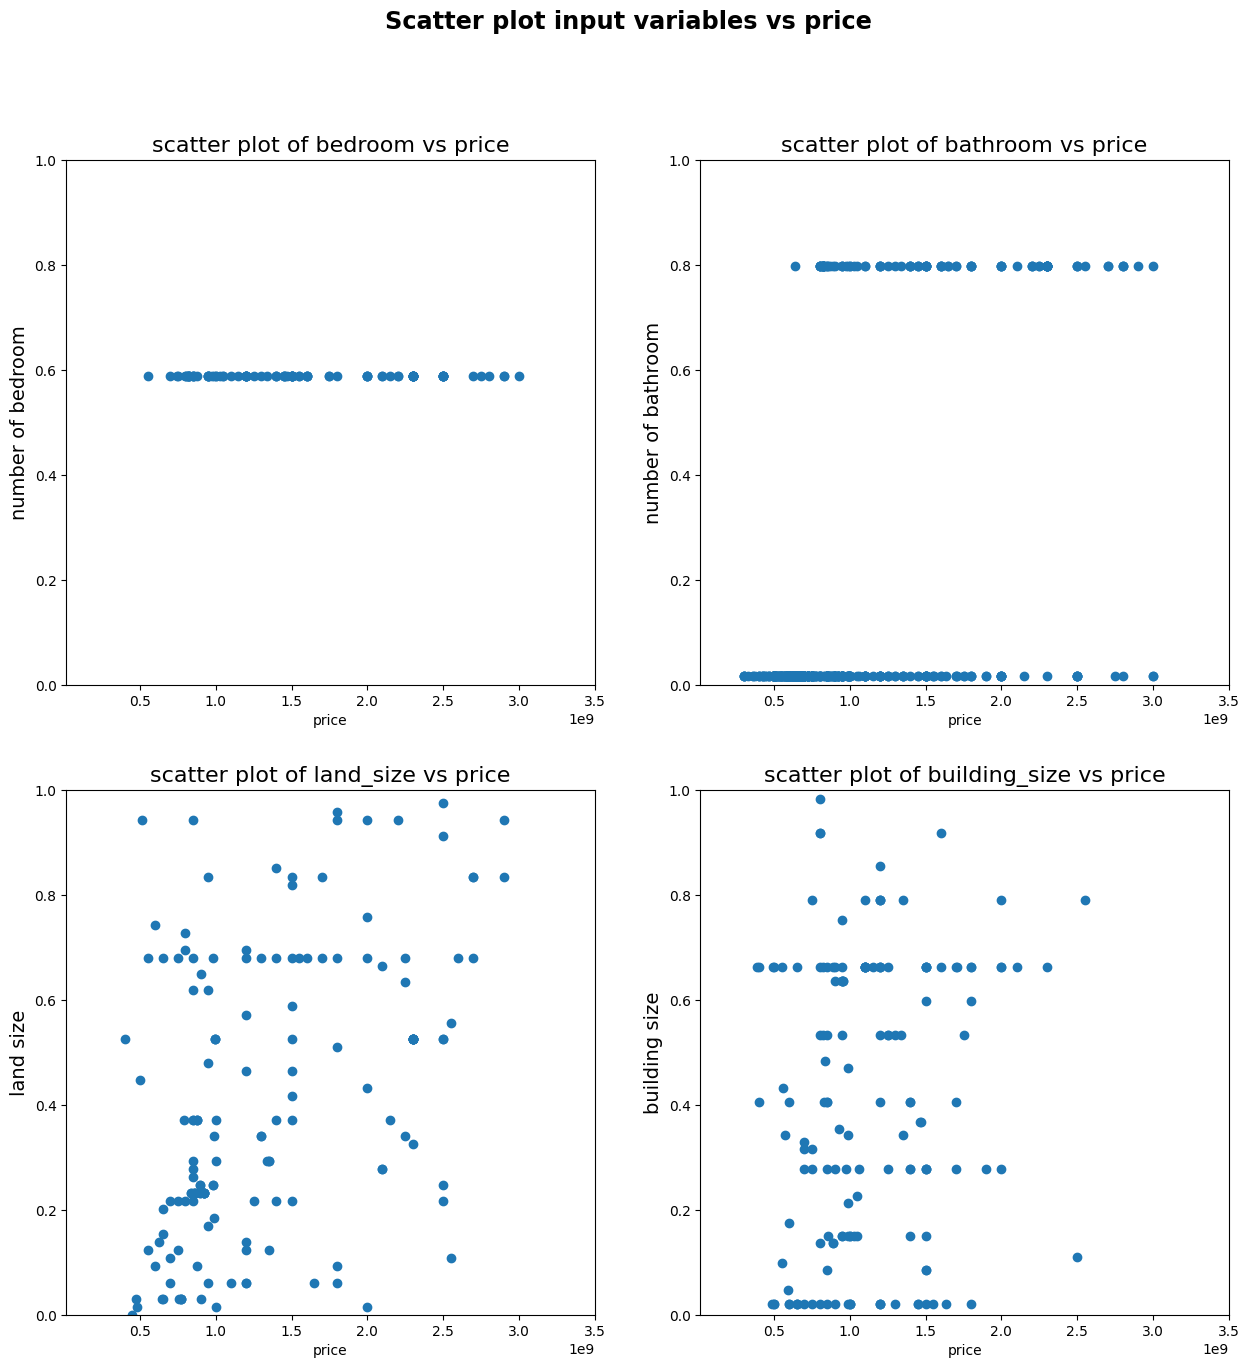

In [93]:
fig = plt.figure(figsize=(15,15))

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

# scatter plot axis 1 for bedrooom vs price, we set ylim bottom of 0 and top of 30 (because we know the max number of bedroom is 24)
ax1.scatter(x=y_train, y=x_train_scaled['bedroom'])
ax1.set_xlabel("price")
ax1.set_ylabel("number of bedroom", fontsize= 14)
ax1.set_ylim(bottom=0, top=1)
ax1.set_xlim(left= 14000000, right=3500000000)
ax1.set_title("scatter plot of bedroom vs price", fontsize = 16)

# scatter plot axis 2 for bathroom vs price, we set ylim top of 15 because we know the max number of bathroom is 15
ax2.scatter(x=y_train, y=x_train_scaled['bathroom'])
ax2.set_xlabel("price")
ax2.set_ylabel("number of bathroom", fontsize= 14)
ax2.set_ylim(bottom=0, top=1)
ax2.set_xlim(left= 14000000, right=3500000000)
ax2.set_title("scatter plot of bathroom vs price", fontsize = 16)

# scatter plot axis 3 for land_size vs price, we set ylim top of 650 because we know the max number of land_size is 600-ish
ax3.scatter(x=y_train, y=x_train_scaled['land_size'])
ax3.set_xlabel("price")
ax3.set_ylabel("land size", fontsize= 14)
ax3.set_ylim(bottom=0, top=1)
ax3.set_xlim(left= 14000000, right=3500000000)
ax3.set_title("scatter plot of land_size vs price", fontsize = 16)

# scatter plot of axis 4 foor building_size vs price, we set ylim tp of 650 , so that it is on the same scale as ax3 (land_size)
ax4.scatter(x=y_train, y=x_train_scaled['building_size'])
ax4.set_xlabel("price")
ax4.set_ylabel("building size", fontsize= 14)
ax4.set_ylim(bottom=0, top=1)
ax4.set_xlim(left= 14000000, right=3500000000)
ax4.set_title("scatter plot of building_size vs price", fontsize = 16)

# set title of the canvas
fig.suptitle(t="Scatter plot input variables vs price", size= "xx-large", weight="bold")

plt.show()

##### solve for betas using sklearn

In [94]:
lr_scaled = LinearRegression()
lr_scaled.fit(X = x_train_scaled,
              y = y_train)

LinearRegression()

In [95]:
y_scaled_pred_train = lr_scaled.predict(x_train_scaled)

# reshape array to 1 dimension so we can compare it in a dataframe
y_scaled_pred_train = y_scaled_pred_train.reshape(-1)
y_scaled_pred_train.ndim

1

In [96]:
y_train_scaled1 = np.array(y_train)
y_train_scaled1 = y_train_scaled1.reshape(-1)
y_train_scaled1

array([900000000, 950315000, 478000000, ..., 483000000, 650000000,
       200000000], dtype=int64)

In [97]:
summary_train_scaled_pred = pd.DataFrame({"actual": y_train_scaled1,
                                          "prediction": y_scaled_pred_train})

summary_train_scaled_pred.head()

,actual,prediction
0,900000000,1366282101.57
1,950315000,994049992.28
2,478000000,430766052.00
3,415232000,460256306.24
4,400000000,430766052.00


In [98]:
summary_train_pred

,actual,prediction
821,900000000,1366282101.57
956,950315000,994049992.28
28,478000000,430766052.00
566,415232000,460256306.24
1074,400000000,430766052.00
...,...,...
1413,2300000000,2391573426.03
770,2800000000,1792795171.73
683,483000000,400783293.47
459,650000000,655830526.59


##### plot actual v prediction

In [99]:
# set general parameter for color
plt.rcParams['axes.facecolor'] = 'black'
plt.rcParams['figure.facecolor'] = 'black'
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['axes.titlecolor'] = 'white'

C:\Users\brian\AppData\Local\Temp\ipykernel_4136\2358657717.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--k" (-> color='k'). The keyword argument will take precedence.
  ax.plot([y.min(), y.max()],[y.min(), y.max()], '--k', color='orange')


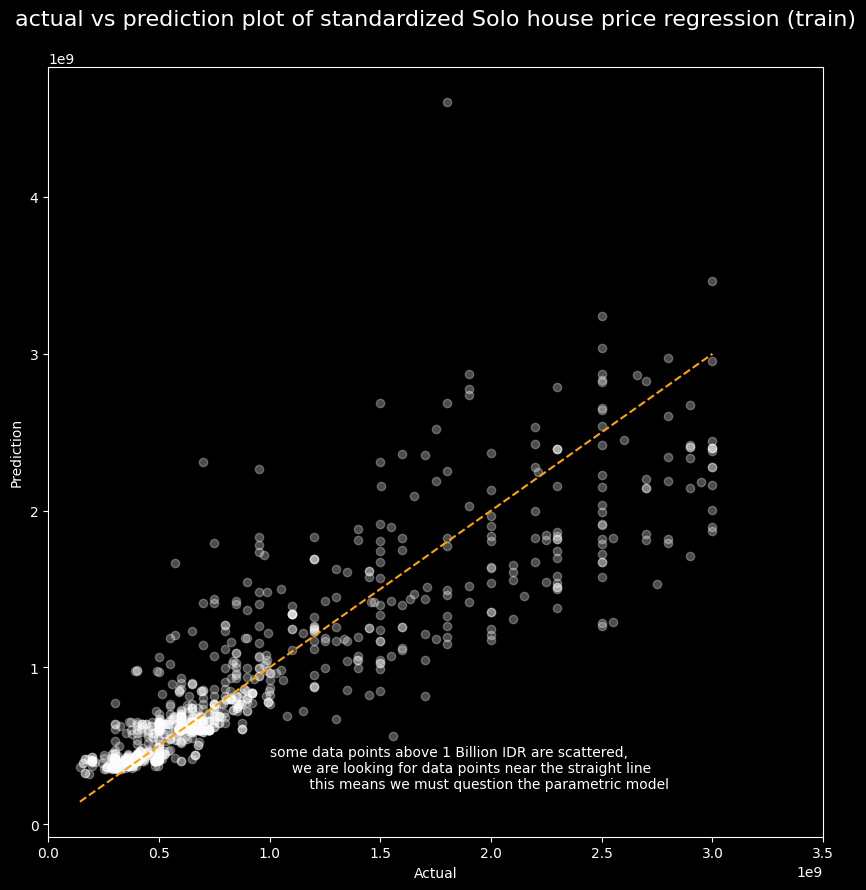

In [100]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()

ax.scatter(summary_train_scaled_pred['actual'],summary_train_scaled_pred[['prediction']], c='white', alpha=0.3)
ax.plot([y.min(), y.max()],[y.min(), y.max()], '--k', color='orange')
ax.set_xlabel('Actual')
ax.set_ylabel('Prediction')
ax.set_xlim(0, 3500000000)

ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

ax.text(1000000000, 230000000, "some data points above 1 Billion IDR are scattered,\n \
    we are looking for data points near the straight line\n \
        this means we must question the parametric model", color='white')

ax.set_title("actual vs prediction plot of standardized Solo house price regression (train)", fontsize= 16, color='white', pad=30)
plt.show()

##### evaluate model

In [101]:
r2_std_train = r2_score(summary_train_scaled_pred['prediction'], summary_train_scaled_pred['actual'])
MAE_std_train = mean_absolute_error(summary_train_scaled_pred['prediction'], summary_train_scaled_pred['actual'])
MSE_std_train = mean_squared_error(summary_train_scaled_pred['prediction'], summary_train_scaled_pred['actual'])

print(f"r2 score standardized train dataset is : {r2_std_train}")
print(f"Mean Absolute Error standardized train dataset is : {MAE_std_train}")
print(f"Mean Squared Error standardized train dataset is : {MSE_std_train}")
print("\n ============================= \n ")

print(f"r2 score wo standardization is : {r2b}")
print(f"Mean Absolute Error wo standardization is : {MAEb}")
print(f"Mean Squared Error wo standardization is : {MSEb}")

r2 score standardized train dataset is : 0.7269737912744556
Mean Absolute Error standardized train dataset is : 179990217.7797195
Mean Squared Error standardized train dataset is : 9.226077726441851e+16

 
r2 score wo standardization is : 0.7269737912744552
Mean Absolute Error wo standardization is : 179990217.779719
Mean Squared Error wo standardization is : 9.226077726441854e+16


#### test_dataset

##### predict

In [102]:
y_pred_scaled_test = lr_scaled.predict(x_test_scaled)
y_pred_scaled_test = y_pred_scaled_test.reshape(-1)
y_pred_scaled_test.ndim

1

In [103]:
y_pred_scaled_test[:1]

array([6.55830527e+08])

In [104]:
y_test_sc = np.array(y_test).reshape(-1)
y_test_sc.ndim

1

In [105]:
y_test_sc[:1]

array([842000000], dtype=int64)

##### actual v pred summary

In [106]:
summary_test_scaled_pred = pd.DataFrame({"actual": y_test_sc,
                                          "prediction": y_pred_scaled_test})

summary_test_scaled_pred.head()

,actual,prediction
0,842000000,655830526.59
1,725500000,602354065.53
2,400000000,400783293.47
3,590000000,855570795.73
4,382000000,406779845.18


In [107]:
summary_test_pred

,actual,prediction
1420,842000000,655830526.59
101,725500000,602354065.53
214,400000000,400783293.47
1158,590000000,855570795.73
1392,382000000,406779845.18
...,...,...
358,345000000,400290789.19
334,631000000,657530991.24
1136,300000000,454259754.53
713,1000000000,1214311791.50


##### plot act v pred

C:\Users\brian\AppData\Local\Temp\ipykernel_4136\399514474.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--k" (-> color='k'). The keyword argument will take precedence.
  ax.plot([y.min(), y.max()],[y.min(), y.max()], '--k', color='orange')


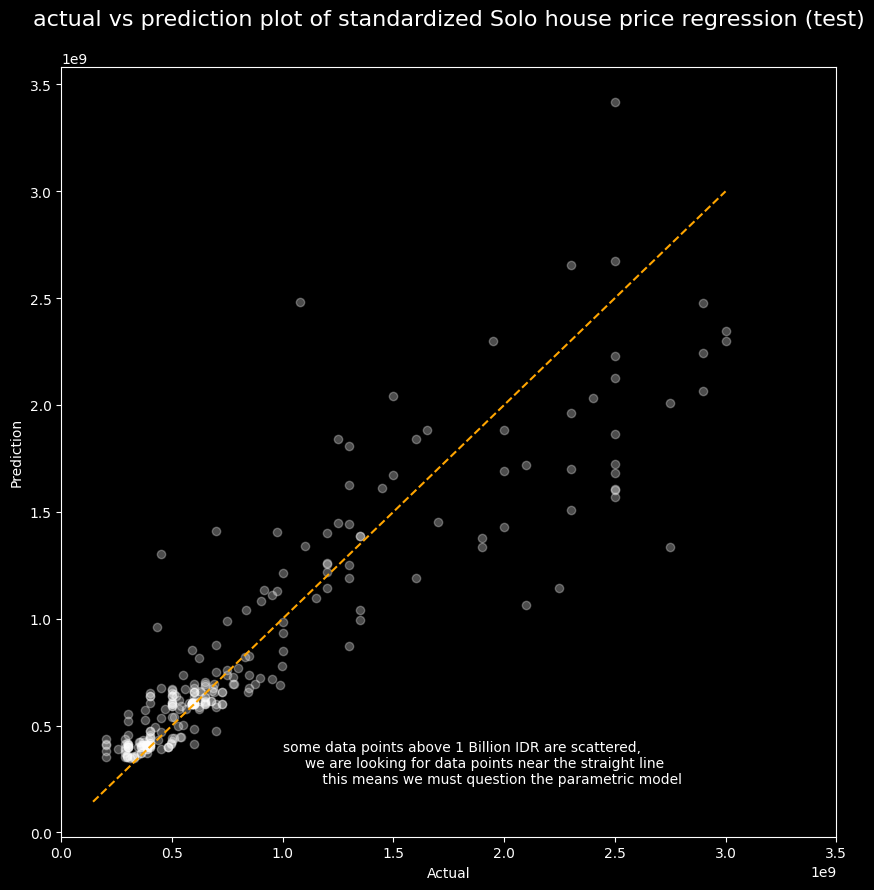

In [108]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()

ax.scatter(summary_test_scaled_pred['actual'],summary_test_scaled_pred[['prediction']], c='white', alpha=0.3)
ax.plot([y.min(), y.max()],[y.min(), y.max()], '--k', color='orange')
ax.set_xlabel('Actual')
ax.set_ylabel('Prediction')
ax.set_xlim(0, 3500000000)

ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

ax.text(1000000000, 230000000, "some data points above 1 Billion IDR are scattered,\n \
    we are looking for data points near the straight line\n \
        this means we must question the parametric model", color='white')

ax.set_title("actual vs prediction plot of standardized Solo house price regression (test)", fontsize= 16, color='white', pad=30)
plt.show()

##### evaluate model

In [109]:
r2_std_test = r2_score(summary_test_scaled_pred['prediction'], summary_test_scaled_pred['actual'])
MAE_std_test = mean_absolute_error(summary_test_scaled_pred['prediction'], summary_test_scaled_pred['actual'])
MSE_std_test = mean_squared_error(summary_test_scaled_pred['prediction'], summary_test_scaled_pred['actual'])
MSE_diff = MSE_test_wo_std - MSE_std_test
MAE_diff = MAE_test_wo_std - MAE_std_test 


print(f"r2 score standardized test is : {r2_std_test}")
print(f"Mean Absolute Error standardized test is : {MAE_std_test}")
print(f"Mean Squared Error standardized test is : {MSE_std_test}")
print(f"Mean Squared Error unstandardized test is : {MSE_test_wo_std}")
print("\n ======================================= \n")

print(f"MSE difference unstandardized vs standardized : {MSE_diff}")
print(f"MAE difference unstandardized vs standardized : {MAE_diff}")

r2 score standardized test is : 0.706960821915106
Mean Absolute Error standardized test is : 173665227.4505443
Mean Squared Error standardized test is : 8.749123554734568e+16
Mean Squared Error unstandardized test is : 8.749123554734578e+16


MSE difference unstandardized vs standardized : 96.0
MAE difference unstandardized vs standardized : -7.748603820800781e-07


##### insights

miniscule difference in MSE and MAE, let's discard parametric model. Let's try to predict using kNN algorithm

# Non parametric regression model

## k-NN

### function prep

#### distances

##### euclidean

In [110]:
def euclidean_distance(a,b) :
    """
    Function to calculate euclidean distance
    :param a: <numpy array> point a
    :param b: <numpy array> point b
    :return dist <array>: distance
    """
    # loop all variables as many as a variable inputted
    n_features = len(a)
    
    # create array zeros as many as n_features
    square = np.zeros(n_features)
    
    # use loop to calculate distance and put it into the square variable (array)
    for i in range(n_features) :
        square[i] = ((a[i]-b[i])**2 )
        
    # calculate the distance
    total = np.sum(square)
    dist = np.sqrt(total)
    return dist


In [111]:
def manhattan_distance(a,b) :
    """
    Function to calculate manhattan distance
    :param a: <numpy array> point a
    :param b: <numpy array> point b
    :return dist <array>: distance
    """
    # loop all variables as many as a variable inputted
    n_features = len(a)
    
    # create array zeros as many as n_features
    container = np.zeros(n_features)
    
    # use loop to calculate distance and put it into the container variable (array)
    for i in range(n_features) :
        container[i] = ((a[i] - b[i]) )

    # calculate the distance using numpy absolute
    absolute = np.absolute(container)
    dist = np.sum(absolute)
    return dist


In [112]:
def calculate_distance(a,b,distance_function) :
    """
    Function to calculate distance
    :param a: <numpy array> point a
    :param b: <numpy array> point b
    :param distance_function: <str> 'euclidean' and 'manhattan'
    :return dist <array>: distance
    """
    if distance_function == 'euclidean' :
        dist = euclidean_distance(a,b)

    elif distance_function == 'manhattan' :
        dist = manhattan_distance(a,b)

    else :
      print('please choose euclidean or manhattan')

    return dist

#### kNN standardize

In [113]:
def KNN(X_test,
        X_train,
        y_train,
        k,
        distance_function,
        standardize):
    """
    Fungsi untuk membuat model k Nearest Neighbor
    :param X_test: <pandas dataframe> data input yang ingin diprediksi
    :param X_train: <pandas dataframe> data input yang dipakai untuk mencari k-observasi
    :param y_train: <pandas dataframe> data output yang dipakai untuk mencari k-observasi
    :param k: <int> jumlah tetangga terdekat
    :param standardize: <bool> true di standardisasikan
    :return majority_vote: <class> 1 atau 0
    :return indeks_tetangga: <list> kumpulan k-tetangga terdekat
    """
    # 1. Lakukan standardisasi if standardize = true
    if standardize:
        # cari mean & variance masing-masing fitur data training
        mean_train = np.mean(X_train, axis=0)
        std_train = np.std(X_train, axis=0)

        # transformasi X_train & X_test
        X_train = (X_train - mean_train)/std_train
        X_test = (X_test - mean_train)/std_train

    # 1. Cari jarak tiap observasi ke target terdekat
    n = len(X_train)
    list_jarak = np.zeros(n)

    for i in X_train.index:
        # Lakukan pencarian jarak berbasis Euclidean/Manhattan
        # PILIHAN JARAK
        titik_1 = X_test.values[0]
        titik_2 = X_train.iloc[[i]].values[0]
        jarak_ = calculate_distance(a = titik_1,
                                    b = titik_2,
                                    distance_function = distance_function)
        list_jarak[i] = jarak_

    # 2. Cari k tetangga terdekat
    indeks_tetangga = list(np.argsort(list_jarak)[:k])
    X_train_tetangga = X_train.iloc[indeks_tetangga]
    y_tetangga = y_train.iloc[indeks_tetangga]

    # 3. Buat hasil prediksi
    y_prediction = y_tetangga.mean()

    return y_prediction, indeks_tetangga


In [114]:
def predict_KNN(X_test,X_train,y_train,k,distance_function,standardize) :
    """
    Fungsi untuk prediksi menggunakan model knn
    :param X_test: <pandas dataframe> data input yang ingin diprediksi
    :param X_train: <pandas dataframe> data input yang dipakai untuk mencari k-observasi
    :param y_train: <pandas dataframe> data output yang dipakai untuk mencari k-observasi
    :param k: <int> jumlah tetangga terdekat
    :param distance_function: <str> 'euclidean' dan 'manhattan'
    :return prediction_result <array>: predicted value
    """
    n_data = len(X_test)
    prediction_result = np.zeros(n_data)
    for i in range(n_data) :
        y_pred,idx = KNN(X_test.iloc[[i]],
            X_train,
            y_train,
            k,
            distance_function,
            standardize
      )
        prediction_result[i] = y_pred
    return prediction_result

In [95]:
# def mean_absolute_error(actual,prediction) :
#     """
#     Fungsi untuk menghitung mean_absolute_error
#     :param actual: <array> nilai aktual
#     :param prediction: <array> nilai hasil prediksi

#     """
#     error = np.abs(actual-prediction).mean()
#     return error

In [96]:
# def mean_squared_error(actual,prediction) :
#     """
#     Fungsi untuk menghitung mean_squared_error
#     :param actual: <array> nilai aktual
#     :param prediction: <array> nilai hasil prediksi

#     """
#     error = np.mean((actual-prediction)**2)
#     return error

### running kNN on train dataset

In [115]:
x_trainknn = x_traina.copy()
x_trainknn.reset_index(drop=True, inplace=True)

x_testknn = x_testa.copy()
x_testknn.reset_index(drop=True, inplace=True)


y_trainknn = y_train.copy()
y_trainknn.reset_index(drop=True, inplace=True)


y_testknn = y_test.copy()
y_testknn.reset_index(drop=True, inplace=True)

In [116]:
candidate_k = [5, 10, 15, 20, 30]
candidate_distance = ['manhattan','euclidean']


# list untuk membuat dataframe
list_of_k = []
list_of_distance = []
mae = []
mse = []
for k in candidate_k :
    for distance_function in candidate_distance :
        y_pred_test = predict_KNN(x_trainknn,x_trainknn,y_trainknn,k,distance_function, standardize=True )
        # calculate error metrics
        mae_val = mean_absolute_error(y_trainknn,y_pred_test)
        mse_val = mean_squared_error(y_trainknn,y_pred_test)
        # mse mae append
        mae.append(mae_val)
        mse.append(mse_val)
        list_of_k.append(k)
        list_of_distance.append(distance_function)

C:\Users\brian\AppData\Local\Temp\ipykernel_4136\3246292518.py:21: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  prediction_result[i] = y_pred
C:\Users\brian\AppData\Local\Temp\ipykernel_4136\3246292518.py:21: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  prediction_result[i] = y_pred
C:\Users\brian\AppData\Local\Temp\ipykernel_4136\3246292518.py:21: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  prediction_result[i] = y_pred
C:\Users\brian\AppData\Local\Temp\ipykernel_4136\3246292518.py:21: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  prediction_result[i] = y_pred
C:\Users\brian\AppData\Local\Tem

##### model eval

In [117]:
model_comparison = pd.DataFrame({'k':list_of_k,'distance_function':list_of_distance,'mae':mae, 'mse':mse})

In [120]:
model_comparison = model_comparison.sort_values('mse')
model_comparison

,k,distance_function,mae,mse
0,5,manhattan,124313156.24,47904398933059432.00
1,5,euclidean,126960349.95,49106027282143224.00
2,10,manhattan,139869854.04,60259810401559872.00
3,10,euclidean,141332359.45,62248244573669696.00
4,15,manhattan,144833486.22,63288032484534432.00
5,15,euclidean,146409133.35,63872437663939408.00
6,20,manhattan,148043975.22,64447812480304416.00
8,30,manhattan,153066873.55,66099308336082448.00
7,20,euclidean,151032719.18,68130973816191080.00
9,30,euclidean,156769817.44,71487233458338888.00


### predict test dataset with k = 5, using manhattaan distance, based on result above

In [121]:
y_preds_testknn = predict_KNN(x_testknn, x_trainknn, y_trainknn, k=5, distance_function="manhattan", standardize=True)

C:\Users\brian\AppData\Local\Temp\ipykernel_4136\3246292518.py:21: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  prediction_result[i] = y_pred


In [122]:
y_preds_testknn

array([6.5900000e+08, 6.8010000e+08, 3.5660000e+08, 6.3400000e+08,
       2.9100000e+08, 2.6990000e+08, 1.5100000e+09, 8.0440000e+08,
       1.4400000e+09, 7.5590010e+08, 2.0000000e+09, 2.8800000e+09,
       6.6360002e+08, 2.2100000e+09, 9.1360000e+08, 3.5660000e+08,
       2.2300000e+09, 5.8340000e+08, 5.7400000e+08, 5.7200000e+08,
       5.8960000e+08, 6.8010000e+08, 4.2168000e+08, 2.2000000e+09,
       5.7400000e+08, 5.6260000e+08, 2.9896000e+08, 2.0400000e+09,
       1.0100000e+09, 6.4500000e+08, 6.3600000e+08, 1.4947000e+09,
       6.5900000e+08, 8.1980000e+08, 4.1640000e+08, 3.5660000e+08,
       2.1200000e+09, 2.8320000e+08, 3.9800000e+08, 5.7400000e+08,
       8.4000000e+08, 2.3400000e+09, 2.1400000e+09, 9.5020000e+08,
       3.5660000e+08, 2.9100000e+08, 3.2406680e+08, 1.3400490e+09,
       6.0798000e+08, 1.1000000e+09, 1.4100000e+09, 9.9000000e+08,
       4.1480000e+08, 6.3580000e+08, 5.9040000e+08, 5.6260000e+08,
       6.8010000e+08, 4.1480000e+08, 6.4500000e+08, 5.6260000e

In [123]:
mse_test_knn = mean_squared_error(y_preds_testknn, y_testknn)
mse_test_knn

6.513344437674955e+16

In [124]:
mse_train_knn = model_comparison['mse'][6]
mse_train_knn

6.444781248030442e+16

In [125]:
mse_test_train_knn_diff = mse_test_knn - mse_train_knn
mse_test_train_knn_diff

685631896445136.0

## using sklearn

In [126]:
from sklearn.neighbors import KNeighborsRegressor

### no standardization

In [127]:
knn_regressor = KNeighborsRegressor(n_neighbors=5) #based on the train dataset using calculation from scratch

In [128]:
knn_regressor.fit(x_traina, y_train)
predictions = knn_regressor.predict(x_testa)

#### model eval

In [129]:
r2_knnstd = r2_score(predictions, y_test)
MAE_knnstd = mean_absolute_error(predictions, y_test)
MSE_knnstd = mean_squared_error(predictions, y_test)

print(f"r2 score test dataset knn wo standardization is : {r2_knnstd}")
print(f"Mean Absolute Error test dataset knn wo standardization is : {MAE_knnstd}")
print(f"Mean Squared Error test dataset knn wo standardization is : {MSE_knnstd}")

r2 score test dataset knn wo standardization is : 0.7746040142933756
Mean Absolute Error test dataset knn wo standardization is : 160946284.6572519
Mean Squared Error test dataset knn wo standardization is : 8.396542342478472e+16


### standardized kNN

In [130]:
x_train_scaled

,bedroom,bathroom,land_size,building_size
821,-0.02,0.02,0.65,1.05
956,-0.02,0.02,-0.50,0.64
28,-0.64,-0.77,-0.40,-0.75
566,-0.64,-0.77,-0.37,-0.68
1074,-0.64,-0.77,-0.40,-0.75
...,...,...,...,...
1413,0.59,0.80,5.07,1.30
770,2.43,0.80,2.72,1.30
683,-0.64,-0.77,-0.56,-0.75
459,-0.02,0.02,-0.33,-0.38


In [131]:
x_test_scaled

,bedroom,bathroom,land_size,building_size
1420,-0.02,0.02,-0.33,-0.38
101,-0.02,0.02,-0.48,-0.44
214,-0.64,-0.77,-0.56,-0.75
1158,-0.64,0.02,-0.34,0.05
1392,-0.64,-0.77,-0.53,-0.75
...,...,...,...,...
358,-0.64,-0.77,-0.68,-0.68
334,-0.02,0.02,-0.34,-0.36
1136,-0.64,-0.77,-0.40,-0.68
713,-0.02,0.02,0.83,0.53


In [132]:
knn_regressor.fit(x_train_scaled, y_train)
predictions = knn_regressor.predict(x_test_scaled)

In [133]:
predictions

array([[6.38000000e+08],
       [6.37100000e+08],
       [3.82000000e+08],
       [6.34000000e+08],
       [3.57400000e+08],
       [2.83200000e+08],
       [1.47000000e+09],
       [9.35000000e+08],
       [1.41000000e+09],
       [7.76100000e+08],
       [2.04000000e+09],
       [2.80000000e+09],
       [6.63600020e+08],
       [1.94000000e+09],
       [9.13600000e+08],
       [3.82000000e+08],
       [2.09000000e+09],
       [5.37380000e+08],
       [6.06000000e+08],
       [6.06000000e+08],
       [5.40000000e+08],
       [6.37100000e+08],
       [3.54180600e+08],
       [2.20000000e+09],
       [6.06000000e+08],
       [5.68000000e+08],
       [2.99760000e+08],
       [1.77000000e+09],
       [1.02000000e+09],
       [6.45000000e+08],
       [6.16000000e+08],
       [1.49470000e+09],
       [6.38000000e+08],
       [9.20000000e+08],
       [4.41000000e+08],
       [3.82000000e+08],
       [2.16000000e+09],
       [2.83200000e+08],
       [4.23980000e+08],
       [6.06000000e+08],


#### model eval

In [134]:
mae_std_test_knn = []
mse_std_test_knn = []
list_k = []


for k in [5,10,15,20, 30, 40]:
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(x_train_scaled, y_train)
    predictions = knn_regressor.predict(x_test_scaled)
    MSE = mean_squared_error(predictions, y_test)
    MAE = mean_absolute_error(predictions, y_test)
    
    mae_std_test_knn.append(MAE)
    mse_std_test_knn.append(MSE)
    list_k.append(k)
    # print(f'MSE for k={k}: {MSE}')

model_comparison_knnsk = pd.DataFrame({'k':list_k,'mae':mae_std_test_knn, 'mse':mse_std_test_knn})
model_comparison_knnsk = model_comparison_knnsk.sort_values('mae')
model_comparison_knnsk
    

,k,mae,mse
0,5,142203997.36,53881771881480792.00
1,10,143443545.59,56140947095757976.00
2,15,149517682.20,61533844744153928.00
3,20,154646561.89,66204148535172136.00
4,30,160611826.11,70766245124740776.00
5,40,163980856.99,75780660802978960.00


In [136]:
prediction_k5 = knn_regressor.predict(x_test_scaled)
prediction_k5 = prediction_k5.reshape(-1)
prediction_k5 = pd.DataFrame({"prediction" : prediction_k5}, index=y_test.index)
pred_comparison = y_test.join(prediction_k5)
pred_comparison = pred_comparison.rename(columns={'price_IDR_mio' : 'actual'})
pred_comparison

,actual,prediction
1420,842000000,649641500.00
101,725500000,647687500.00
214,400000000,409875000.00
1158,590000000,765785035.00
1392,382000000,367150000.00
...,...,...
358,345000000,355888363.88
334,631000000,649029002.50
1136,300000000,418728675.00
713,1000000000,1207375000.00


#### plot actual v pred k = 5

C:\Users\brian\AppData\Local\Temp\ipykernel_4136\3462432309.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--k" (-> color='k'). The keyword argument will take precedence.
  ax.plot([y.min(), y.max()],[y.min(), y.max()], '--k', color='orange')


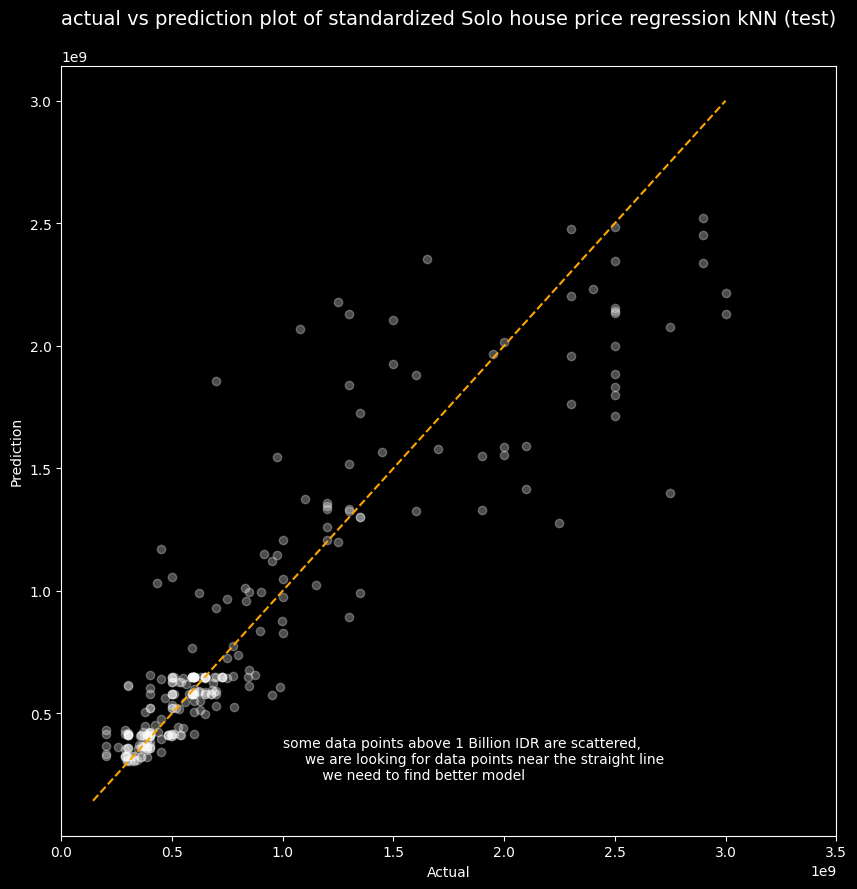

In [137]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()

ax.scatter(pred_comparison['actual'],pred_comparison[['prediction']], c='white', alpha=0.3)
ax.plot([y.min(), y.max()],[y.min(), y.max()], '--k', color='orange')
ax.set_xlabel('Actual')
ax.set_ylabel('Prediction')
ax.set_xlim(0, 3500000000)

ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

ax.text(1000000000, 230000000, "some data points above 1 Billion IDR are scattered,\n \
    we are looking for data points near the straight line\n \
        we need to find better model", color='white')

ax.set_title("actual vs prediction plot of standardized Solo house price regression kNN (test)", fontsize= 14, color='white', pad=30)
plt.show()

# Insights

Neither Multiple Linear Regression using OLS from scratch or standardized kNN can predict house price in surakarta. Need to try another non-parametric machine learning algorithms for regression to have best prediction of house price.

To be continued...